#### Import Packages

In [1]:
import warnings
import pandas as pd
import numpy as np
import time
import random
import datetime as dt
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import seaborn as sns
from sklearn.metrics import homogeneity_completeness_v_measure, homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import sklearn.metrics as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scikitplot.cluster import plot_elbow_curve
import networkx as nx
warnings.simplefilter('ignore')

##### Data Set Information

Online Retail Data Set 

The data set contains 8 columns, and around 540,000 rows.

You can download the data from UCI in this like: [_here_](https://archive.ics.uci.edu/ml/datasets/online+retail)

#### Load data

In [2]:
# load data to work on it
data = pd.read_csv('f:/GA/data/E-Commerce Data/data.csv')

In [3]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12/01/2010 08:26       2.55     17850.0  United Kingdom  
1  12/01/2010 08:26       3.39     17850.0  United Kingdom  
2  12/01/2010 08:26       2.75     17850.0  United Kingdom  
3  12/01/2010 08:26       3.39     17850.0  United Kingdom  
4  12/01/2010 08:26       3.39     17850.0  United Kingdom

#### Read the data

In [4]:
data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.shape

(541909, 8)

In [7]:
# count and percentage of missing value in data fram

def missing_value(df):
    count = df.isnull().sum().sort_values(ascending=False)
    percent= (df.isnull().sum() / data.isnull().count().sort_values(ascending=False)*100)
    missing_data = pd.concat([count,percent], axis=1, keys=['missing_Value', 'percent %'])
    print(missing_data.round(2))

In [8]:
def data_info(df):
    print('Number of duplicated rows', df.duplicated().sum())
    print('------------------------------------')
    print('Number of NOT duplicated rows', (~df.duplicated()).sum())
    print('------------------------------------')
    print('data shape',df.shape)
    print('------------------------------------')
    print(missing_value(df))
    print('------------------------------------')

In [9]:
data_info(data)

Number of duplicated rows 5268
------------------------------------
Number of NOT duplicated rows 536641
------------------------------------
data shape (541909, 8)
------------------------------------
             missing_Value  percent %
CustomerID          135080      24.93
Description           1454       0.27
InvoiceNo                0       0.00
StockCode                0       0.00
Quantity                 0       0.00
InvoiceDate              0       0.00
UnitPrice                0       0.00
Country                  0       0.00
None
------------------------------------


#### Clean the data

In [10]:
# drop duplicated row, but keep the last
data.drop_duplicates(keep='last',inplace=True)

In [11]:
# take a look at the null valuse

null_data = data[data['Description'].isnull()]

In [12]:
null_data.sample(10)

InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
242441    558346     35965         NaN         3   6/28/2011 14:45        0.0   
145259    548889    84875A         NaN       -17  04/04/2011 15:26        0.0   
173327    551691    18098C         NaN        10  05/03/2011 13:36        0.0   
147792    549137    84459B         NaN        -7  04/06/2011 15:24        0.0   
150149    549331    40018F         NaN       -22  04/08/2011 10:54        0.0   
171575    551431    44091A         NaN        -2   4/28/2011 15:06        0.0   
480500    577306     72817         NaN        12  11/18/2011 13:06        0.0   
336410    566323     22035         NaN         1  09/12/2011 12:02        0.0   
131701    547595     82483         NaN       -12   3/24/2011 11:20        0.0   
1972      536547     37509         NaN         1  12/01/2010 14:33        0.0   

        CustomerID         Country  
242441         NaN  United Kingdom  
145259         NaN  United Kingdom  
173327         NaN  United Kingdom  
147792         NaN  United Kingdom  
150149         NaN  United Kingdom  
171575         NaN  United Kingdom  
480500         NaN  United Kingdom  
336410         NaN  United Kingdom  
131701         NaN  United Kingdom  
1972           NaN  United Kingdom

From sample of the data we can see that:

we can see where is the Description has missing valuse also the CustomerID is missing and UnitPrice is 0

we can see the missing values in each columns:

Description has 1454 missing values with 2.5 % of the data.
CustomerID has 135080 missing values with 24.9 % of the data.

so, beacuse we have big data we can drop all the rows with missing value in column Description and CustomerID.

In [13]:
# dropping rows with missing value in column Description
data.dropna(subset=['Description'],inplace = True)
data.dropna(subset=['CustomerID'],inplace = True)

In [14]:
data_info(data)

Number of duplicated rows 0
------------------------------------
Number of NOT duplicated rows 401604
------------------------------------
data shape (401604, 8)
------------------------------------
             missing_Value  percent %
InvoiceNo                0        0.0
StockCode                0        0.0
Description              0        0.0
Quantity                 0        0.0
InvoiceDate              0        0.0
UnitPrice                0        0.0
CustomerID               0        0.0
Country                  0        0.0
None
------------------------------------


let find how many order was cancel (all InvoiceNo start with C are canceled)

In [15]:
# find the number of canceled orders

canceled_orders = []
for each in data['InvoiceNo']:
    if each.startswith('C'):
        canceled_orders.append(each)
        
print ('Number of canceled orders: ',len(canceled_orders))

print('percentage of canceled orders',round (len(canceled_orders)/len(data['InvoiceNo'])*100,2),'%')

Number of canceled orders:  8872
percentage of canceled orders 2.21 %


In [16]:
invoiceNo_with_C = data[data['InvoiceNo'].str.startswith('C')]

In [17]:
invoiceNo_with_C.sample(10)

InvoiceNo StockCode                         Description  Quantity  \
500162   C578743      POST                             POSTAGE        -3   
384409   C570122     82482   WOODEN PICTURE FRAME WHITE FINISH        -2   
263321   C559983     23313           VINTAGE CHRISTMAS BUNTING        -8   
24931    C538350     37447   CERAMIC CAKE DESIGN SPOTTED PLATE        -4   
516555   C579930     23251        VINTAGE RED ENAMEL TRIM MUG         -1   
19444    C537860     21244                BLUE POLKADOT PLATE         -8   
122508   C546881     82483  WOOD 2 DRAWER CABINET WHITE FINISH        -3   
440203   C574515    79191C         RETRO PLASTIC ELEPHANT TRAY       -12   
334050   C566222     23118        PARISIENNE JEWELLERY DRAWER         -1   
222693   C556453     21622    VINTAGE UNION JACK CUSHION COVER        -6   

             InvoiceDate  UnitPrice  CustomerID         Country  
500162  11/25/2011 11:35      18.00     12681.0          France  
384409  10/07/2011 12:58       2.95     15874.0  United Kingdom  
263321   7/14/2011 11:41       4.95     14562.0  United Kingdom  
24931   12/10/2010 15:01       1.25     13798.0  United Kingdom  
516555  12/01/2011 09:36       1.25     15563.0  United Kingdom  
19444   12/08/2010 16:15       1.69     16252.0  United Kingdom  
122508   3/17/2011 17:17       5.95     15159.0  United Kingdom  
440203  11/04/2011 13:38       0.85     15159.0  United Kingdom  
334050  09/09/2011 16:34       7.50     13458.0  United Kingdom  
222693  06/10/2011 16:33       4.95     14525.0  United Kingdom

we can see all the Quantities(Quantity) with Invoice number(InvoiceNo) starts with c in NEGATIVE.
And the unit price is POSITIVE 

So, I will drop all the rows contains InvoiceNo with c

In [18]:
data = data[~data['InvoiceNo'].str.startswith('C')]

In [19]:
data[data['InvoiceNo'].str.startswith('C')]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [20]:
data.shape

(392732, 8)

In [21]:
# cheack if there any row with no quantity ( meaning if quantity = 0 or less)

under = data['Quantity']<= 0
under.sum()

0

In [22]:
# number of unique value in each column
data.agg(['nunique']).T

nunique
InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37

In [23]:
data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12/01/2010 08:26       2.55     17850.0  United Kingdom  
1  12/01/2010 08:26       3.39     17850.0  United Kingdom

cheack if there any UnitPrice is 0

In [24]:
aa = data[data["Quantity"] == 0]

In [25]:
aa.shape

(0, 8)

In [26]:
dd = data[data["UnitPrice"] == 0]

In [27]:
dd.shape

(40, 8)

In [28]:
dd.sample(10)

InvoiceNo StockCode                       Description  Quantity  \
187613    553000     47566                     PARTY BUNTING         4   
479546    577168         M                            Manual         1   
314745    564651     23270  SET OF 2 CERAMIC PAINTED HEARTS         96   
454464    575579     22089     PAPER BUNTING VINTAGE PAISLEY        24   
298054    562973     23157        SET OF 6 NATIVITY MAGNETS        240   
33576     539263     22580      ADVENT CALENDAR GINGHAM SACK         4   
479079    577129     22464       HANGING METAL HEART LANTERN         4   
502122    578841     84826    ASSTD DESIGN 3D PAPER STICKERS     12540   
314748    564651     21786                POLKADOT RAIN HAT        144   
282912    561669     22960          JAM MAKING SET WITH JARS        11   

             InvoiceDate  UnitPrice  CustomerID         Country  
187613  05/12/2011 15:21        0.0     17667.0  United Kingdom  
479546  11/18/2011 10:42        0.0     12603.0         Germany  
314745   8/26/2011 14:19        0.0     14646.0     Netherlands  
454464  11/10/2011 11:49        0.0     13081.0  United Kingdom  
298054  08/11/2011 11:42        0.0     14911.0            EIRE  
33576   12/16/2010 14:36        0.0     16560.0  United Kingdom  
479079  11/17/2011 19:52        0.0     15602.0  United Kingdom  
502122  11/25/2011 15:57        0.0     13256.0  United Kingdom  
314748   8/26/2011 14:19        0.0     14646.0     Netherlands  
282912   7/28/2011 17:09        0.0     12507.0           Spain

I will drop all UnitPrice with value 0 , beacuse it is just 40 rows 

In [29]:
data.drop(data[data['UnitPrice'] == 0].index, inplace=True)

In [30]:
print(data['UnitPrice']==0)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: UnitPrice, Length: 392692, dtype: bool


In [31]:
data.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12/01/2010 08:26       2.55     17850.0  United Kingdom  
1  12/01/2010 08:26       3.39     17850.0  United Kingdom  
2  12/01/2010 08:26       2.75     17850.0  United Kingdom

mcreate new column ( total)

In [32]:
data['Total'] = data['Quantity'] * data['UnitPrice']

In [33]:
data.shape

(392692, 9)

In [34]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  Total  
0  12/01/2010 08:26       2.55     17850.0  United Kingdom  15.30  
1  12/01/2010 08:26       3.39     17850.0  United Kingdom  20.34  
2  12/01/2010 08:26       2.75     17850.0  United Kingdom  22.00  
3  12/01/2010 08:26       3.39     17850.0  United Kingdom  20.34  
4  12/01/2010 08:26       3.39     17850.0  United Kingdom  20.34

In [35]:
subset = data.sample(n=500)

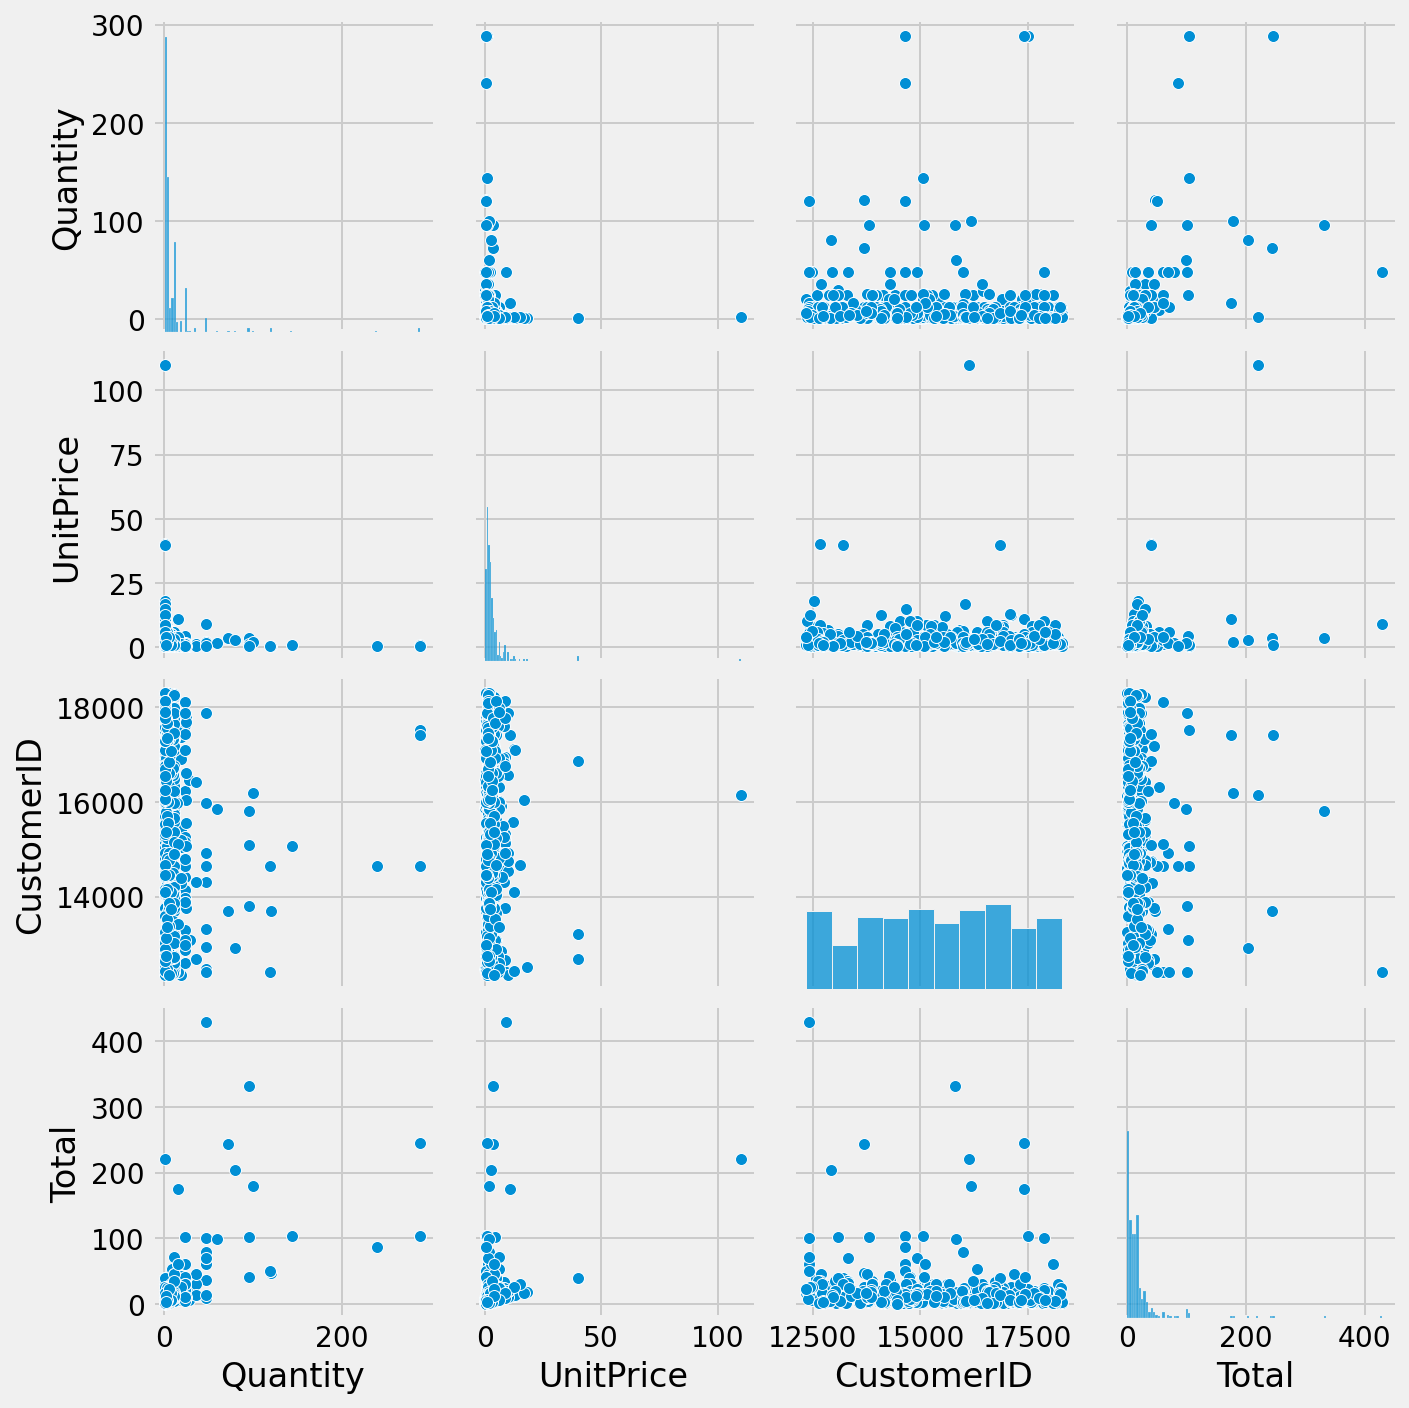

In [36]:
sns.pairplot(subset)

In [37]:
data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

        InvoiceDate  UnitPrice  CustomerID         Country  Total  
0  12/01/2010 08:26       2.55     17850.0  United Kingdom  15.30  
1  12/01/2010 08:26       3.39     17850.0  United Kingdom  20.34

##### Take a look of the total number of products, InvoiceNo and customers

In [38]:
totla_data = pd.DataFrame([{'products': data['StockCode'].value_counts().count(),    
               'InvoiceNo': data['InvoiceNo'].value_counts().count(),
               'customers': data['CustomerID'].value_counts().count(),  
              }], columns = ['products', 'InvoiceNo', 'customers'], index = ['quantity'])

In [39]:
totla_data

products  InvoiceNo  customers
quantity      3665      18532       4338

#### Countries that have the most customers

In [40]:
#Number of customers in each country 

customer_vs_country = data.groupby('Country').CustomerID.nunique().sort_values(ascending=False)

In [41]:
customer_vs_country.to_frame().head(40)

CustomerID
Country                         
United Kingdom              3920
Germany                       94
France                        87
Spain                         30
Belgium                       25
Switzerland                   21
Portugal                      19
Italy                         14
Finland                       12
Austria                       11
Norway                        10
Netherlands                    9
Australia                      9
Denmark                        9
Channel Islands                9
Cyprus                         8
Sweden                         8
Japan                          8
Poland                         6
USA                            4
Canada                         4
Unspecified                    4
Greece                         4
EIRE                           3
Israel                         3
Malta                          2
United Arab Emirates           2
Bahrain                        2
Czech Republic                 1
Lithuania                      1
Lebanon                        1
RSA                            1
Saudi Arabia                   1
Singapore                      1
Iceland                        1
Brazil                         1
European Community             1

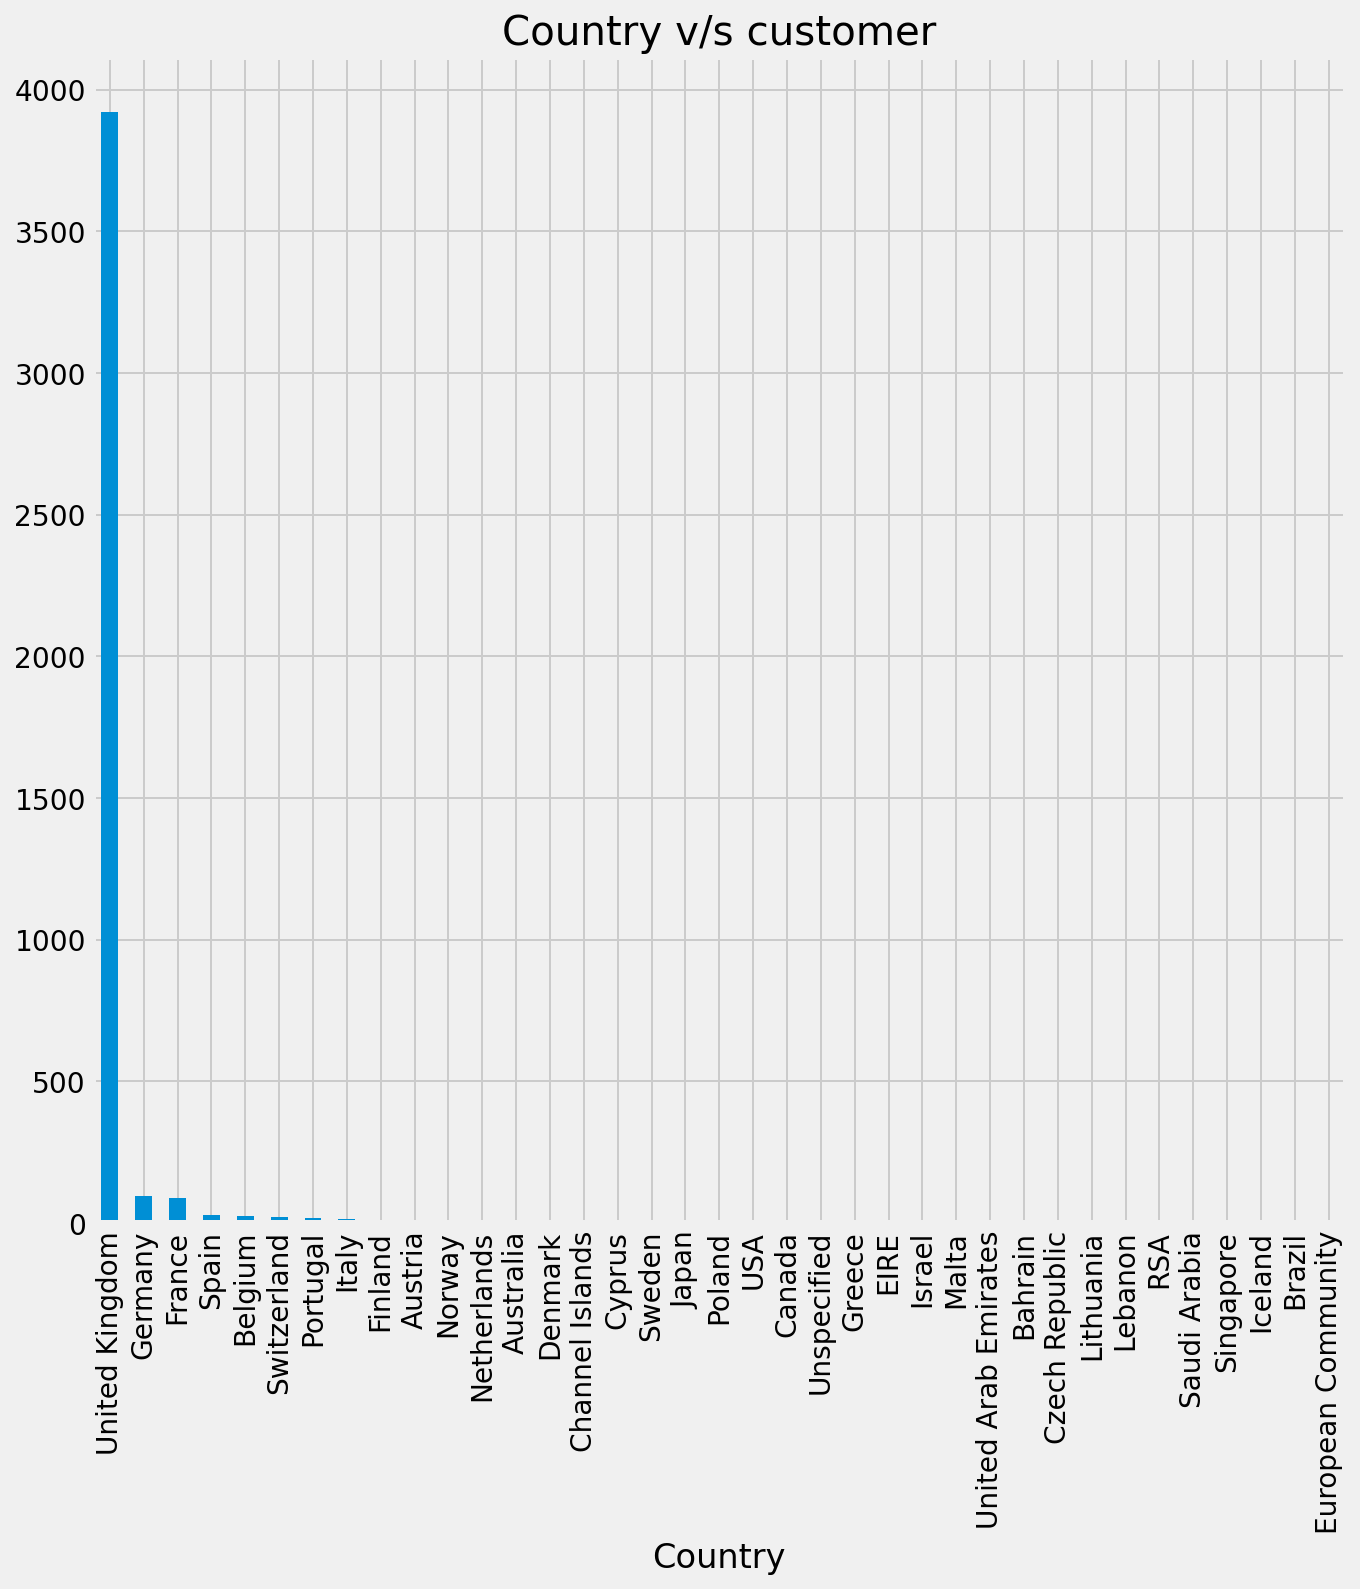

In [42]:
#Number of customers in each country 

plt.figure(figsize=(10,10))
customer_vs_country.plot.bar(title="Country v/s customer") 
plt.show()

In [43]:
data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

        InvoiceDate  UnitPrice  CustomerID         Country  Total  
0  12/01/2010 08:26       2.55     17850.0  United Kingdom  15.30  
1  12/01/2010 08:26       3.39     17850.0  United Kingdom  20.34

In [44]:
customer_vs_country_1 = data.groupby(['Country'],as_index=False).agg({'CustomerID':'nunique'})
total_customers = customer_vs_country_1['CustomerID'].sum(axis=0)
customer_vs_country_1['Customers percentage'] = round((customer_vs_country_1['CustomerID']/total_customers)*100,2)

In [45]:
customer_vs_country_1.sort_values(by=['Customers percentage'],ascending=False,inplace=True)
customer_vs_country_1.reset_index(drop=True,inplace=True)

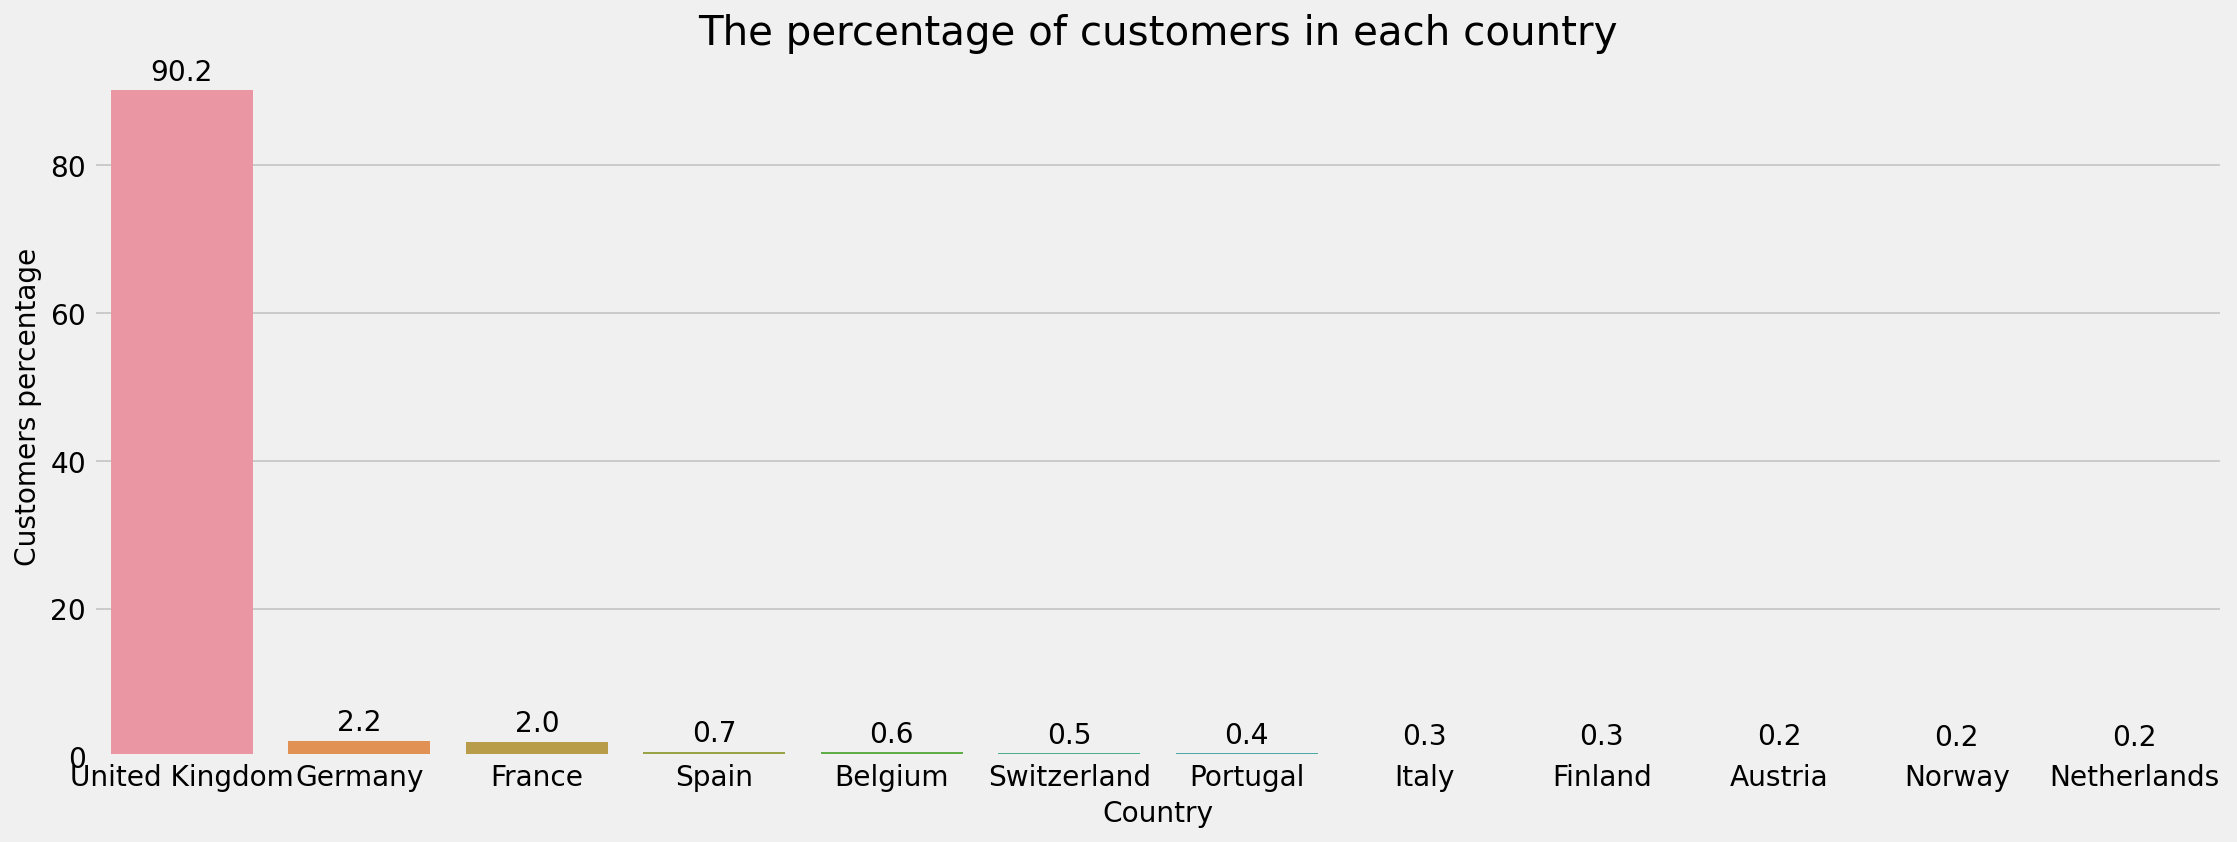

In [46]:
plt.figure(figsize=(17,6))
splot=sns.barplot(x="Country",y="Customers percentage",data=customer_vs_country_1[:12])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('The percentage of customers in each country')
plt.xlabel("Country", size=14)
plt.ylabel("Customers percentage", size=14)
plt.show()

#### Countries that have the most orders

In [47]:
#Number of total all orders in each country without ununique

print(data[['InvoiceNo','Country']].groupby('Country').count().sort_values("InvoiceNo",ascending = False))

                      InvoiceNo
Country                        
United Kingdom           349203
Germany                    9025
France                     8326
EIRE                       7226
Spain                      2479
Netherlands                2359
Belgium                    2031
Switzerland                1841
Portugal                   1453
Australia                  1181
Norway                     1071
Italy                       758
Channel Islands             747
Finland                     685
Cyprus                      603
Sweden                      450
Austria                     398
Denmark                     380
Poland                      330
Japan                       321
Israel                      245
Unspecified                 241
Singapore                   222
Iceland                     182
USA                         179
Canada                      151
Greece                      145
Malta                       112
United Arab Emirates         68
European

In [48]:
print(data[['InvoiceNo','Country']].groupby('Country').count().sort_values("InvoiceNo",ascending = False))

                      InvoiceNo
Country                        
United Kingdom           349203
Germany                    9025
France                     8326
EIRE                       7226
Spain                      2479
Netherlands                2359
Belgium                    2031
Switzerland                1841
Portugal                   1453
Australia                  1181
Norway                     1071
Italy                       758
Channel Islands             747
Finland                     685
Cyprus                      603
Sweden                      450
Austria                     398
Denmark                     380
Poland                      330
Japan                       321
Israel                      245
Unspecified                 241
Singapore                   222
Iceland                     182
USA                         179
Canada                      151
Greece                      145
Malta                       112
United Arab Emirates         68
European

In [49]:
temp = data.groupby(['Country'],as_index=False).agg({'InvoiceNo':'nunique'}).rename(columns = {'InvoiceNo':'Orders'})
total = temp['Orders'].sum(axis=0)
temp['orders percentage'] = round((temp['Orders']/total)*100,4)

In [50]:
temp.sort_values(by=['orders percentage'],ascending=False,inplace=True)
temp.reset_index(drop=True,inplace=True)

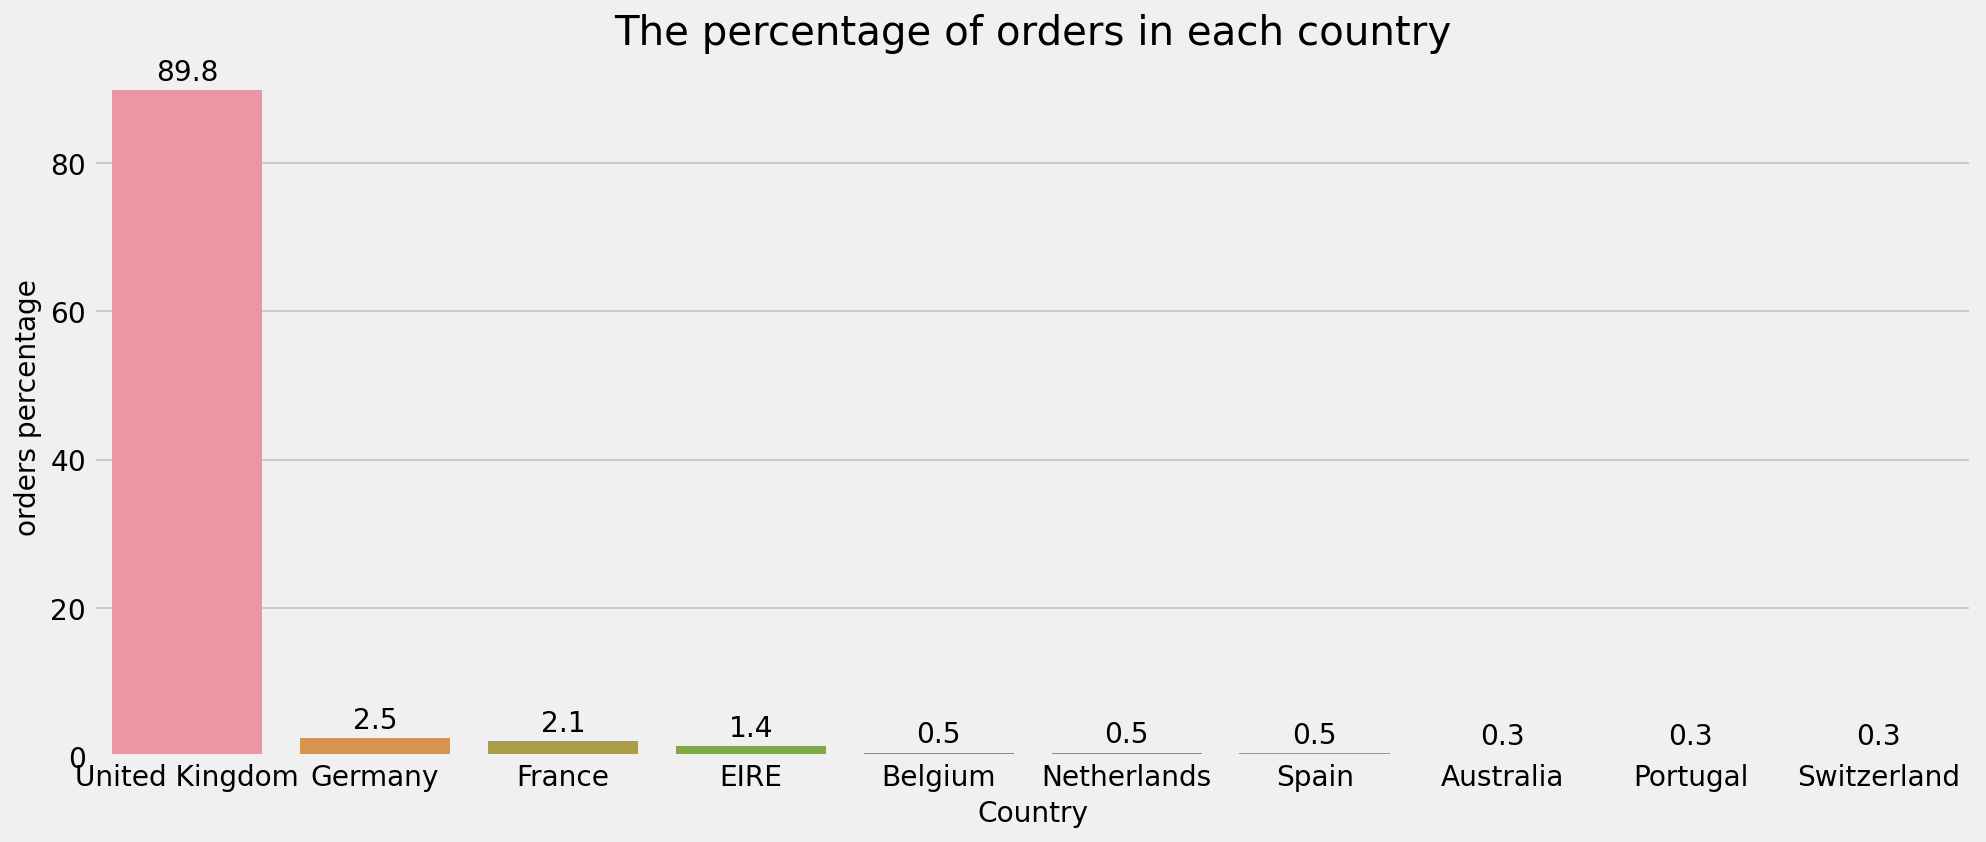

In [51]:
plt.figure(figsize=(15,6))
splot=sns.barplot(x="Country",y="orders percentage",data=temp[:10])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('The percentage of orders in each country')
plt.xlabel("Country", size=14)
plt.ylabel("orders percentage", size=14)
plt.show()

In [52]:
#Number all ununique orders in each country

order_vs_country = data.groupby('Country').InvoiceNo.nunique().sort_values(ascending=False)

In [53]:
order_vs_country.to_frame()

InvoiceNo
Country                        
United Kingdom            16646
Germany                     457
France                      389
EIRE                        260
Belgium                      98
Netherlands                  94
Spain                        90
Australia                    57
Portugal                     57
Switzerland                  51
Finland                      41
Italy                        38
Norway                       36
Sweden                       36
Channel Islands              26
Poland                       19
Japan                        19
Denmark                      18
Austria                      17
Cyprus                       16
Unspecified                   8
Iceland                       7
Singapore                     7
Canada                        6
Malta                         5
Israel                        5
Greece                        5
USA                           5
Lithuania                     4
European Community            4
United Arab Emirates          3
Czech Republic                2
Bahrain                       2
Lebanon                       1
RSA                           1
Saudi Arabia                  1
Brazil                        1

#### Countries that have the most quantity

In [54]:
data['Quantity'].sum()

5152002

In [55]:
# Number of quantity in each country

quantity_vs_country = data.groupby('Country').Quantity.sum().sort_values(ascending=False)

In [56]:
quantity_vs_country.to_frame()

Quantity
Country                       
United Kingdom         4241305
Netherlands             200361
EIRE                    140133
Germany                 119154
France                  111428
Australia                83891
Sweden                   36078
Switzerland              30082
Spain                    27933
Japan                    26016
Belgium                  23237
Norway                   19336
Portugal                 16095
Finland                  10704
Channel Islands           9485
Denmark                   8235
Italy                     8112
Cyprus                    6340
Singapore                 5241
Austria                   4881
Israel                    4043
Poland                    3684
Canada                    2763
Iceland                   2458
USA                       2458
Unspecified               1785
Greece                    1557
United Arab Emirates       982
Malta                      970
Czech Republic             671
Lithuania                  652
European Community         499
Lebanon                    386
Brazil                     356
RSA                        351
Bahrain                    260
Saudi Arabia                80

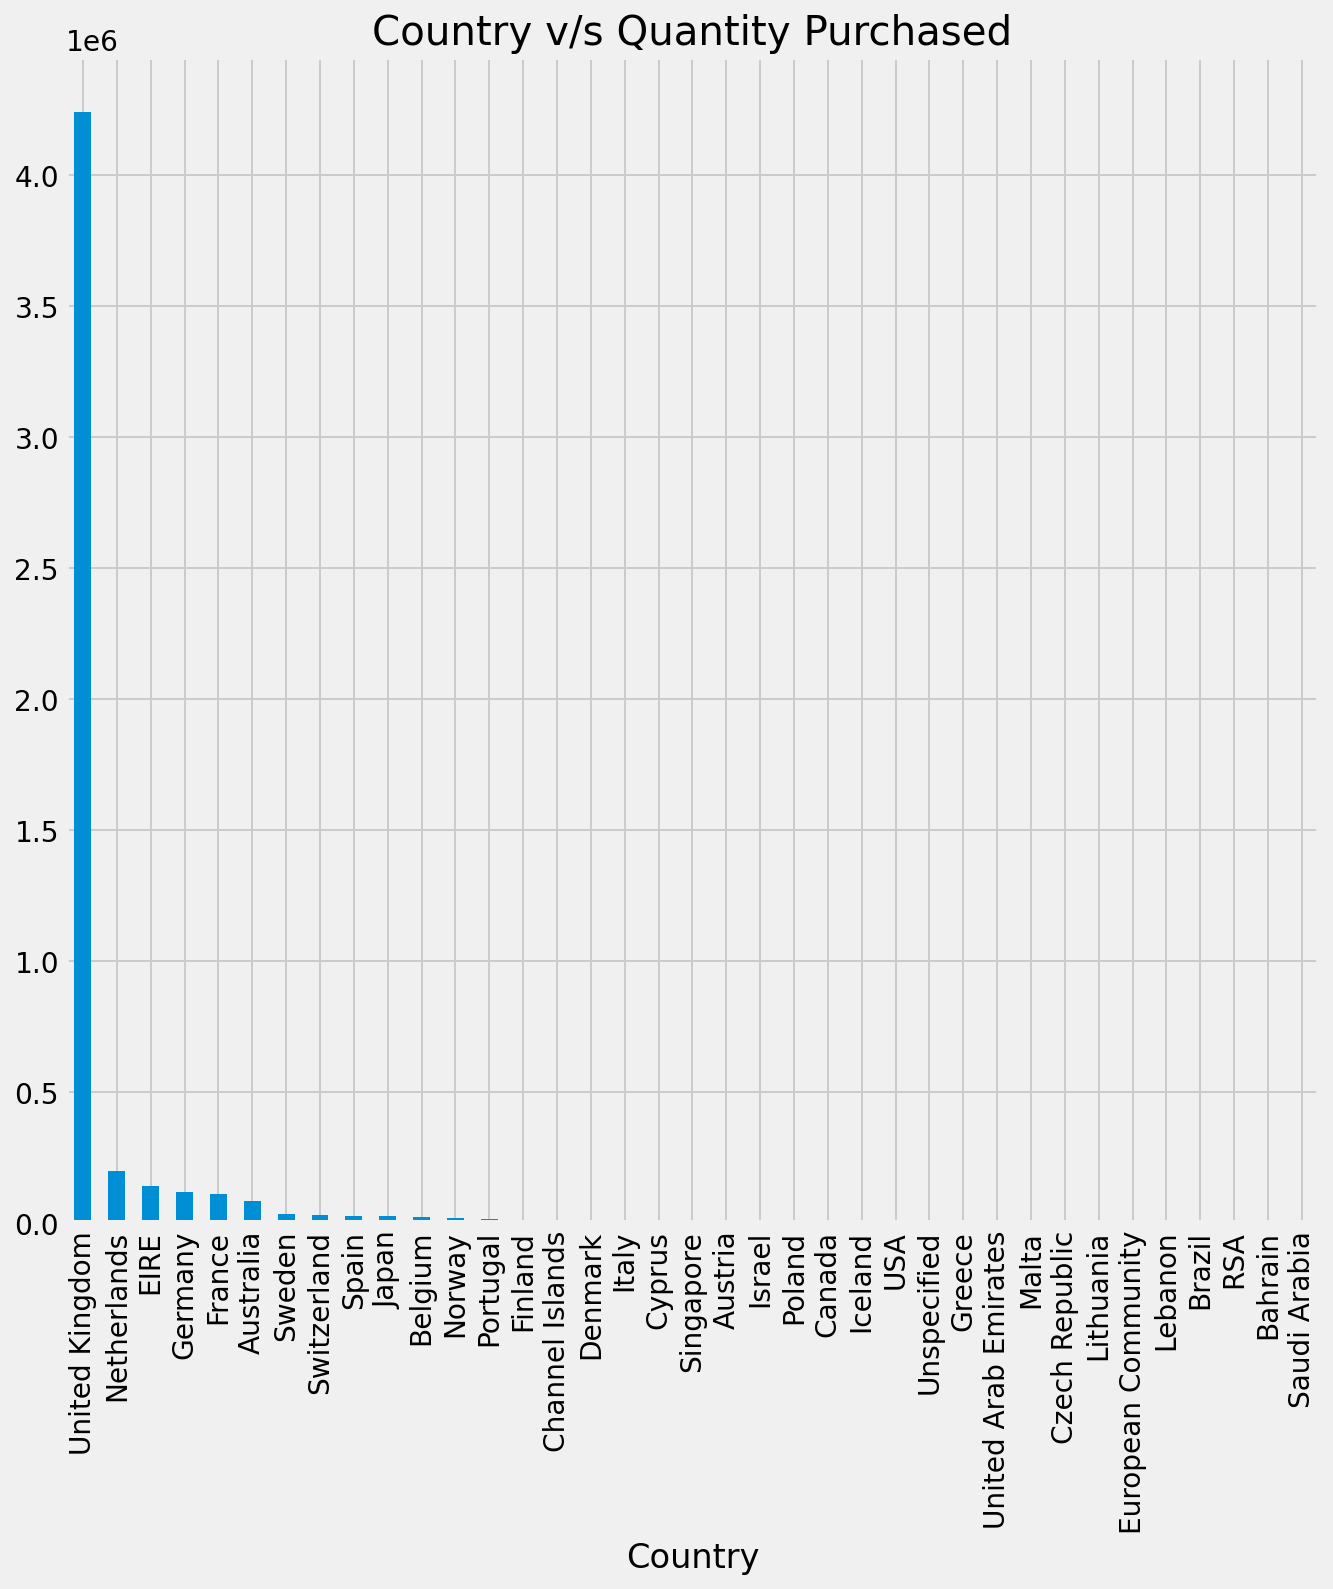

In [57]:
# Number of quantity in each country

plt.figure(figsize=(10,10))
quantity_vs_country.plot.bar(title="Country v/s Quantity Purchased") 
plt.show()

#### Customers that have the most orders to the least in all Customers 

In [58]:
data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

        InvoiceDate  UnitPrice  CustomerID         Country  Total  
0  12/01/2010 08:26       2.55     17850.0  United Kingdom  15.30  
1  12/01/2010 08:26       3.39     17850.0  United Kingdom  20.34

In [59]:
data.InvoiceNo.nunique()

18532

In [60]:
data.CustomerID.nunique()

4338

In [61]:
Customer_per_ordre_list = data.groupby(['CustomerID','Country']).InvoiceNo.nunique().sort_values(ascending=False)

In [62]:
Customer_per_ordre_list

CustomerID  Country       
12748.0     United Kingdom    209
14911.0     EIRE              201
17841.0     United Kingdom    124
13089.0     United Kingdom     97
14606.0     United Kingdom     93
                             ... 
13739.0     United Kingdom      1
16222.0     United Kingdom      1
13740.0     United Kingdom      1
16216.0     United Kingdom      1
12346.0     United Kingdom      1
Name: InvoiceNo, Length: 4346, dtype: int64

In [63]:
Customer_per_ordre_list.shape

(4346,)

In [64]:
Customer_per_ordre_list.sum()

18532

In [65]:
# first 100 customers with most orders

first_100 = Customer_per_ordre_list.head(100)

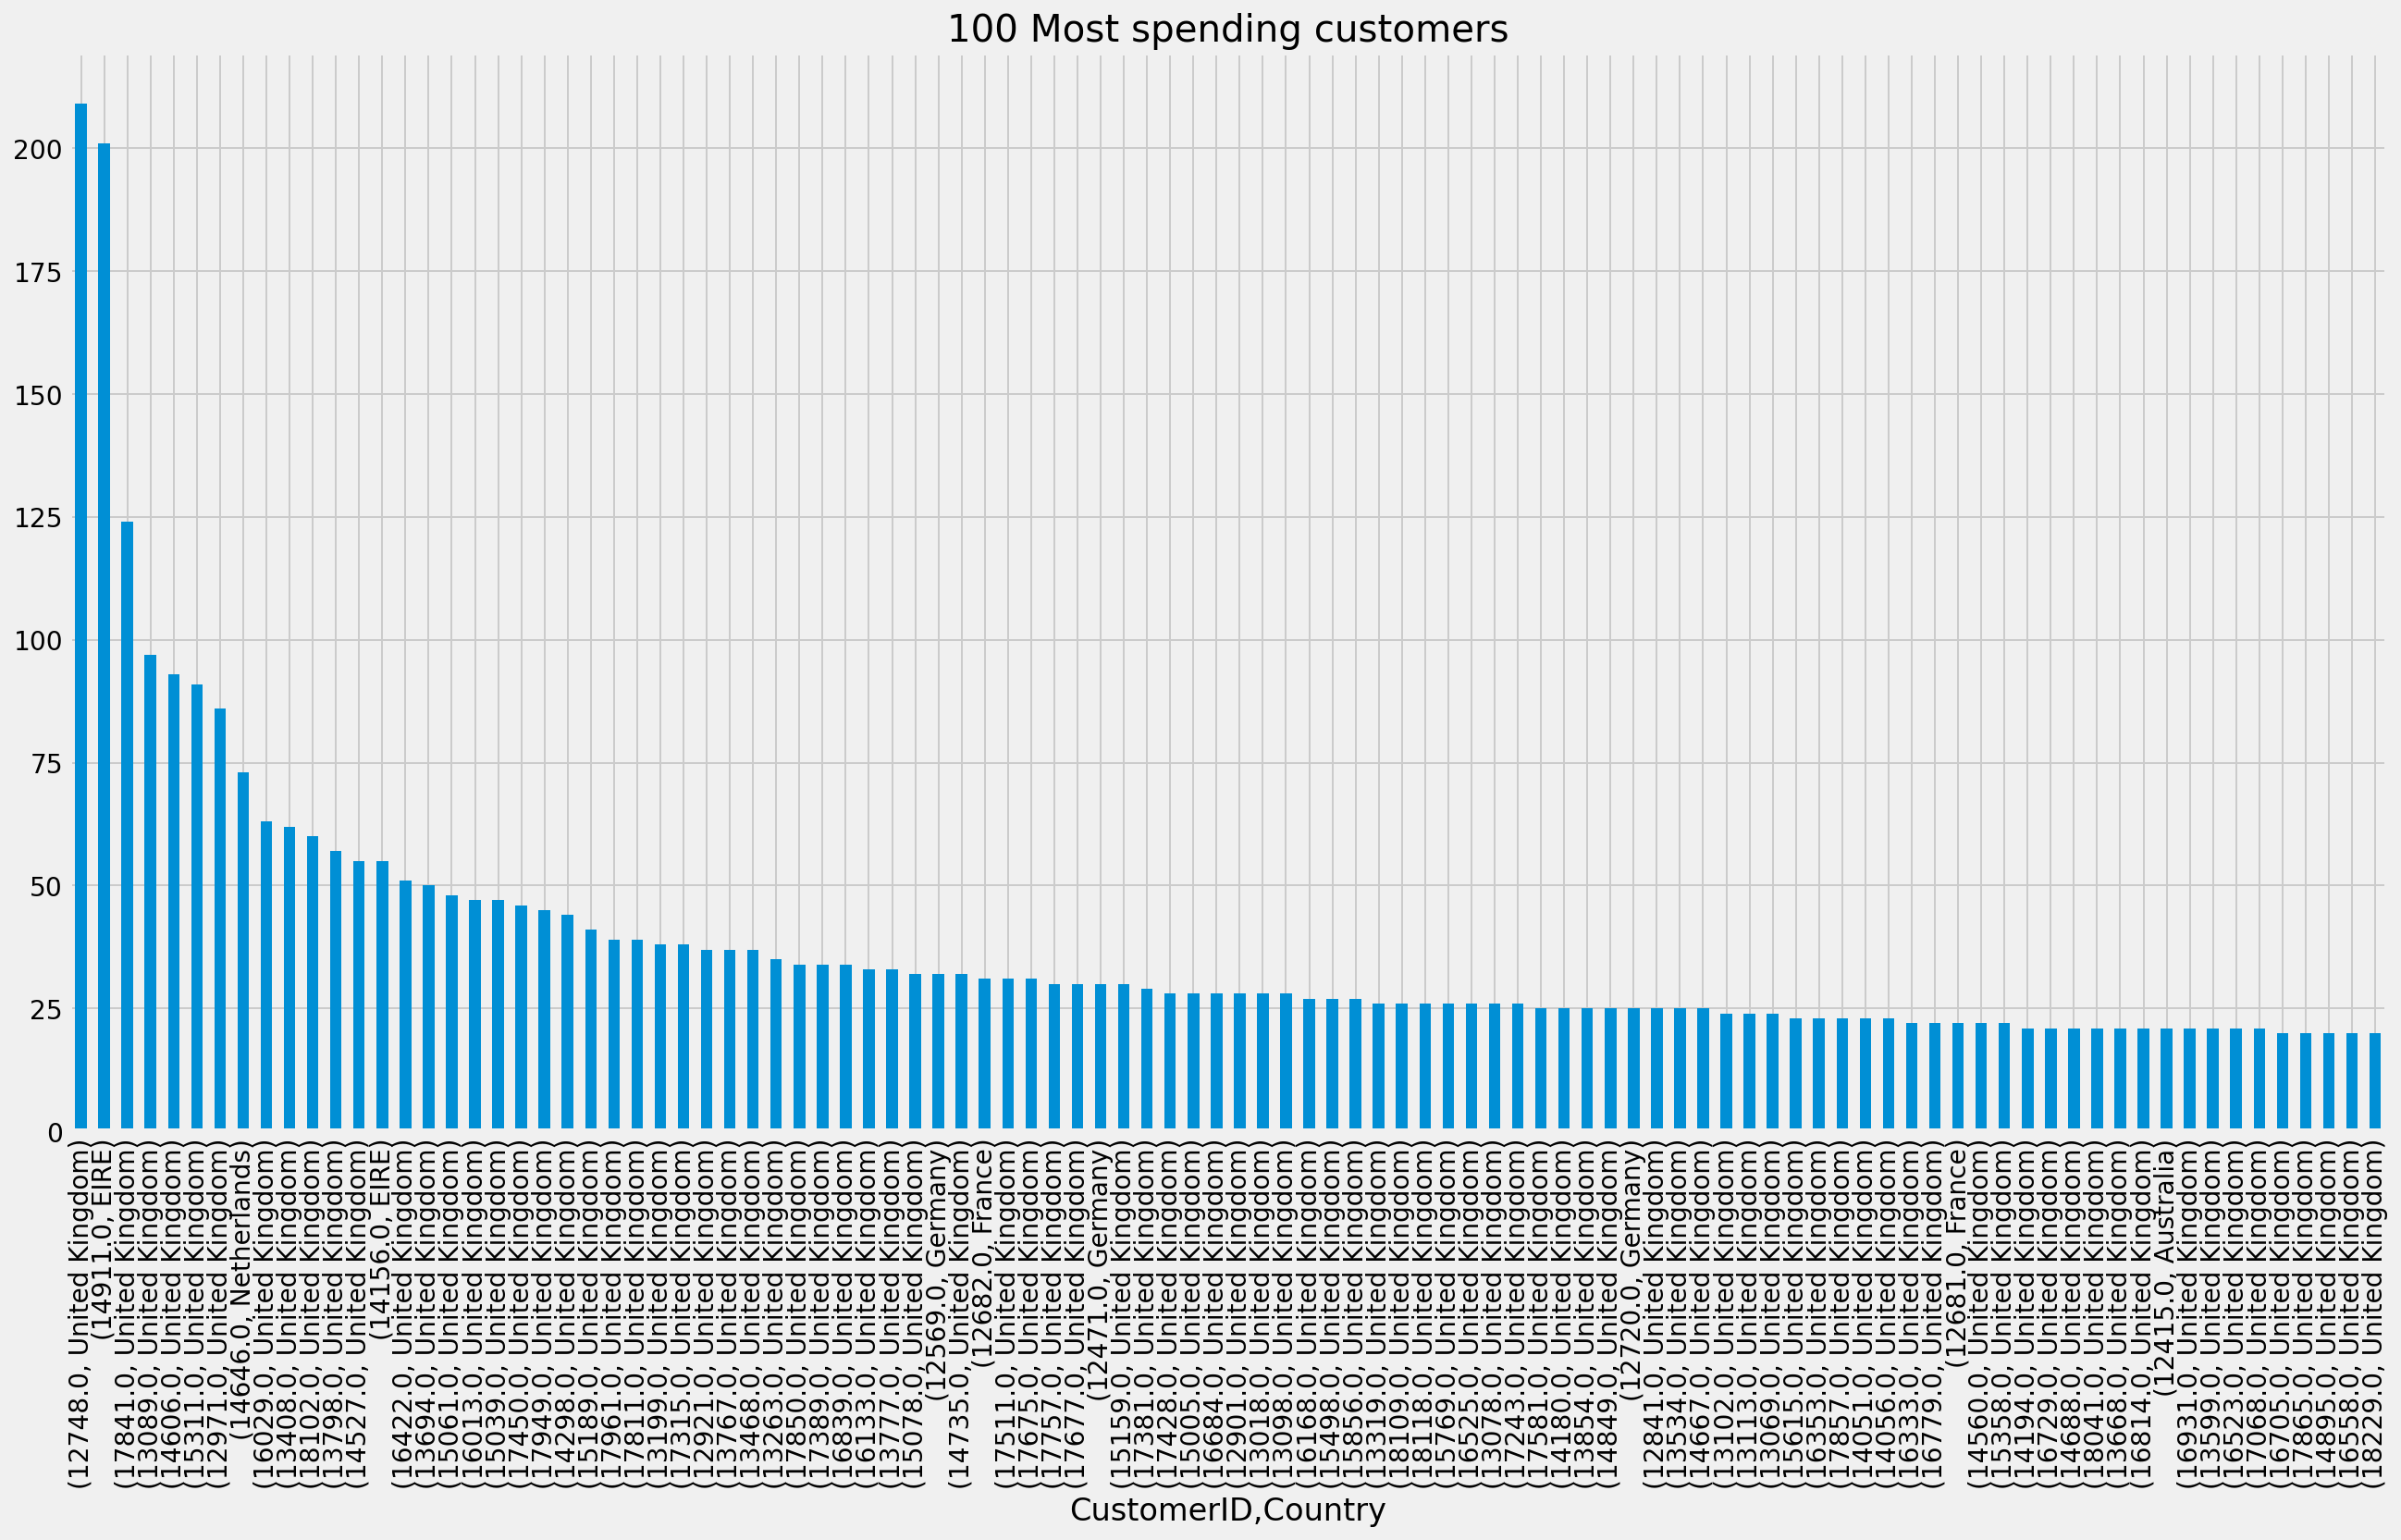

In [66]:
plt.figure(figsize=(20,10))
first_100.plot.bar(title="100 Most spending customers") 
plt.show()

In [67]:
# first 20 customer with most orders

first_20 = Customer_per_ordre_list.head(20)

In [68]:
first_20

CustomerID  Country       
12748.0     United Kingdom    209
14911.0     EIRE              201
17841.0     United Kingdom    124
13089.0     United Kingdom     97
14606.0     United Kingdom     93
15311.0     United Kingdom     91
12971.0     United Kingdom     86
14646.0     Netherlands        73
16029.0     United Kingdom     63
13408.0     United Kingdom     62
18102.0     United Kingdom     60
13798.0     United Kingdom     57
14527.0     United Kingdom     55
14156.0     EIRE               55
16422.0     United Kingdom     51
13694.0     United Kingdom     50
15061.0     United Kingdom     48
16013.0     United Kingdom     47
15039.0     United Kingdom     47
17450.0     United Kingdom     46
Name: InvoiceNo, dtype: int64

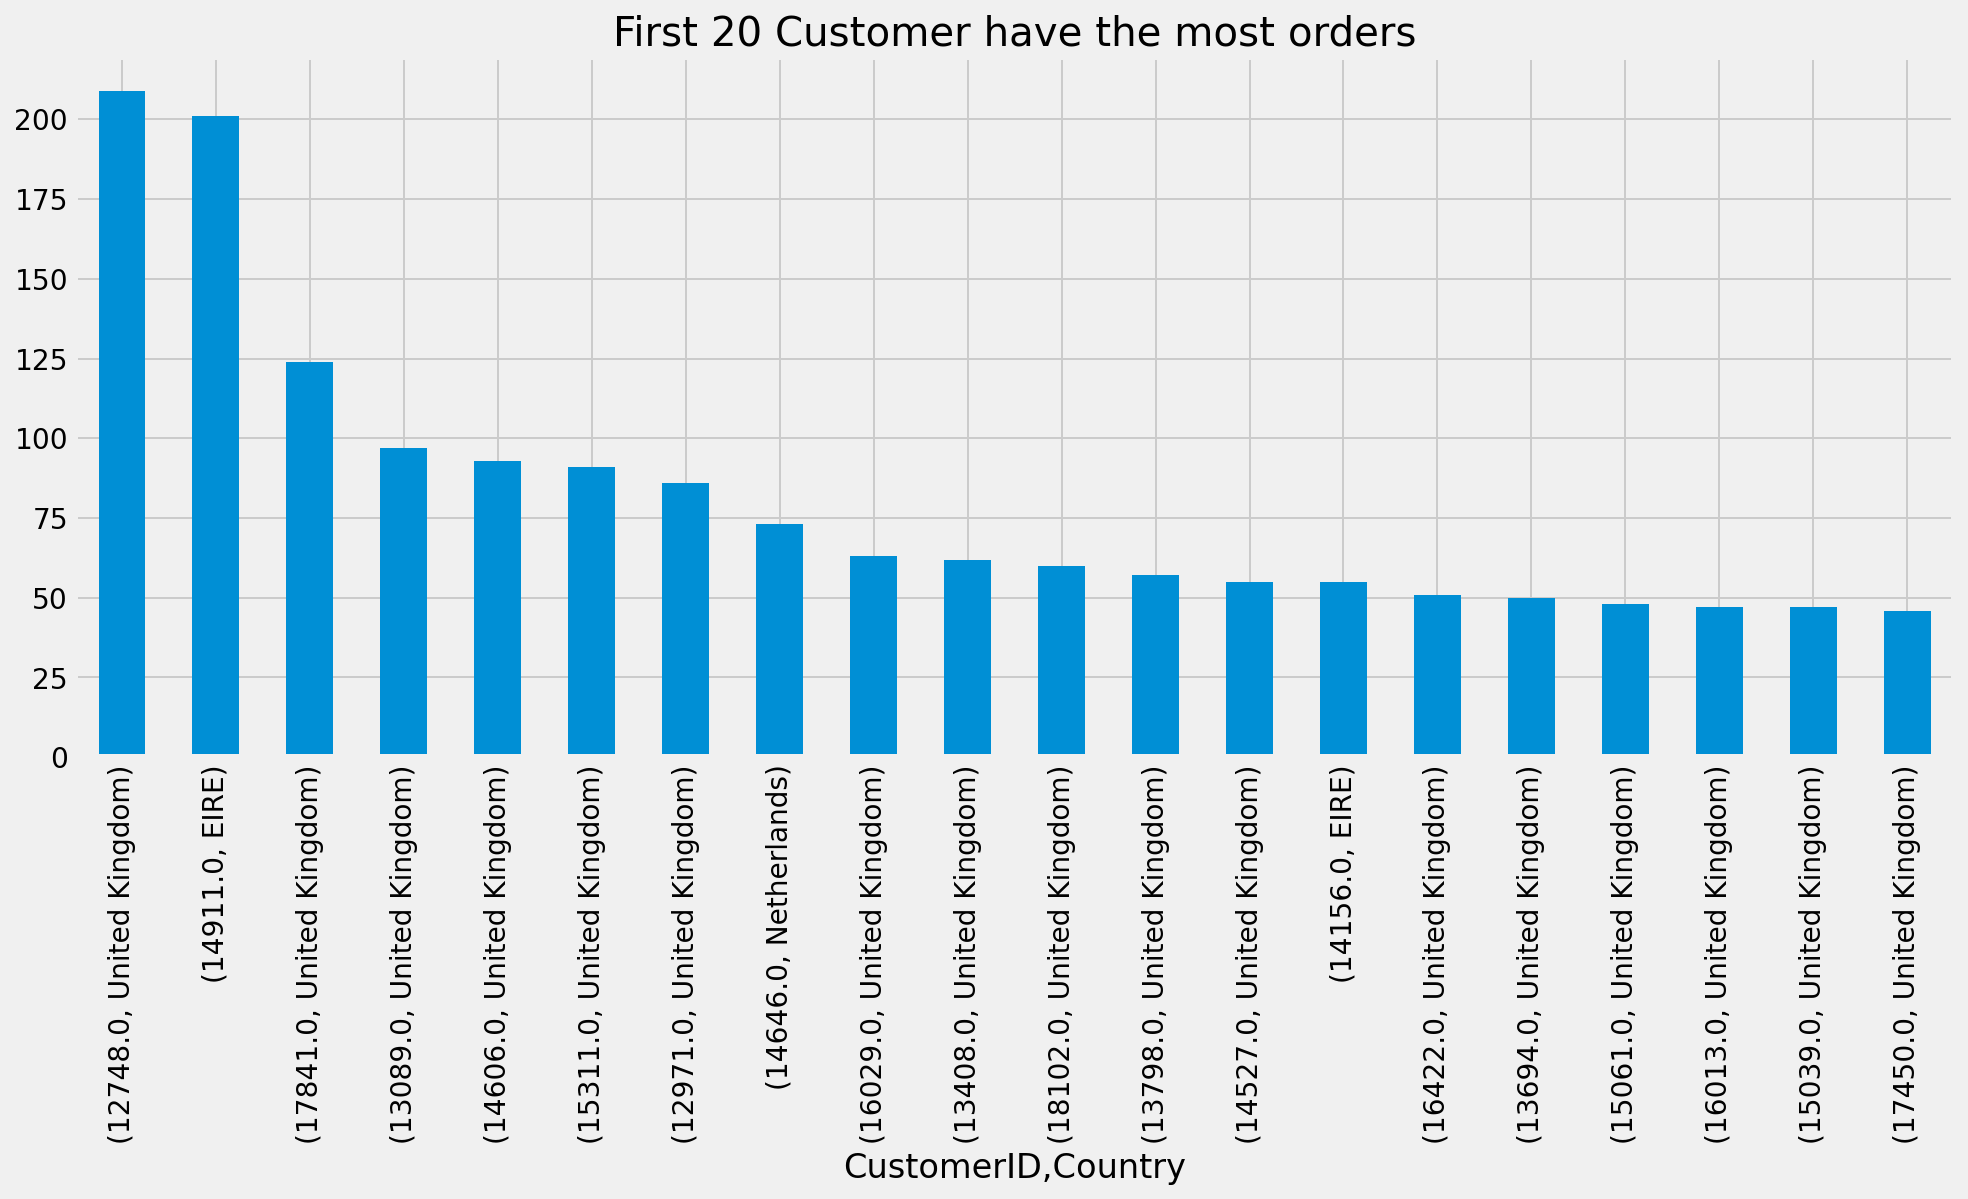

In [69]:
plt.figure(figsize=(15,6))
first_20.plot.bar(title="First 20 Customer have the most orders") 
plt.show()

In [70]:
Customer_per_ordre_list = data.groupby(['CustomerID','Country']).InvoiceNo.nunique().sort_values(ascending=False)

In [71]:
 Customer_per_ordre_list.shape

(4346,)

In [72]:
# customer they have orders between 1 and 20


list_20 = {}
for each in range(1,21):
    #customer_with_order = Customer_per_ordre_list == each
    customer_with_order = Customer_per_ordre_list.loc[ Customer_per_ordre_list.to_frame()['InvoiceNo'] == each]
    #l = customer_with_order.shape
    list_20.update({each: customer_with_order.shape[0]})
    
    print("customer with",each,"order:",customer_with_order.shape[0])
    print("------------------------------------------")
    #total_order.append(l[0])
    #order_number.append(each)
    #zip_list = zip(x_list_20, y_list_20)
    #new_list = tuple(zip_list)

customer with 1 order: 1499
------------------------------------------
customer with 2 order: 838
------------------------------------------
customer with 3 order: 509
------------------------------------------
customer with 4 order: 387
------------------------------------------
customer with 5 order: 243
------------------------------------------
customer with 6 order: 171
------------------------------------------
customer with 7 order: 142
------------------------------------------
customer with 8 order: 99
------------------------------------------
customer with 9 order: 67
------------------------------------------
customer with 10 order: 54
------------------------------------------
customer with 11 order: 52
------------------------------------------
customer with 12 order: 45
------------------------------------------
customer with 13 order: 31
------------------------------------------
customer with 14 order: 20
------------------------------------------
customer with 15 orde

In [73]:
list_20

{1: 1499,
 2: 838,
 3: 509,
 4: 387,
 5: 243,
 6: 171,
 7: 142,
 8: 99,
 9: 67,
 10: 54,
 11: 52,
 12: 45,
 13: 31,
 14: 20,
 15: 27,
 16: 11,
 17: 18,
 18: 14,
 19: 12,
 20: 12}

In [74]:
new_list = pd.DataFrame({'Number OF Order' : list_20.keys() , 'Total' : list_20.values() })

In [75]:
new_list = new_list.set_index('Number OF Order')

In [76]:
new_list

Total
Number OF Order       
1                 1499
2                  838
3                  509
4                  387
5                  243
6                  171
7                  142
8                   99
9                   67
10                  54
11                  52
12                  45
13                  31
14                  20
15                  27
16                  11
17                  18
18                  14
19                  12
20                  12

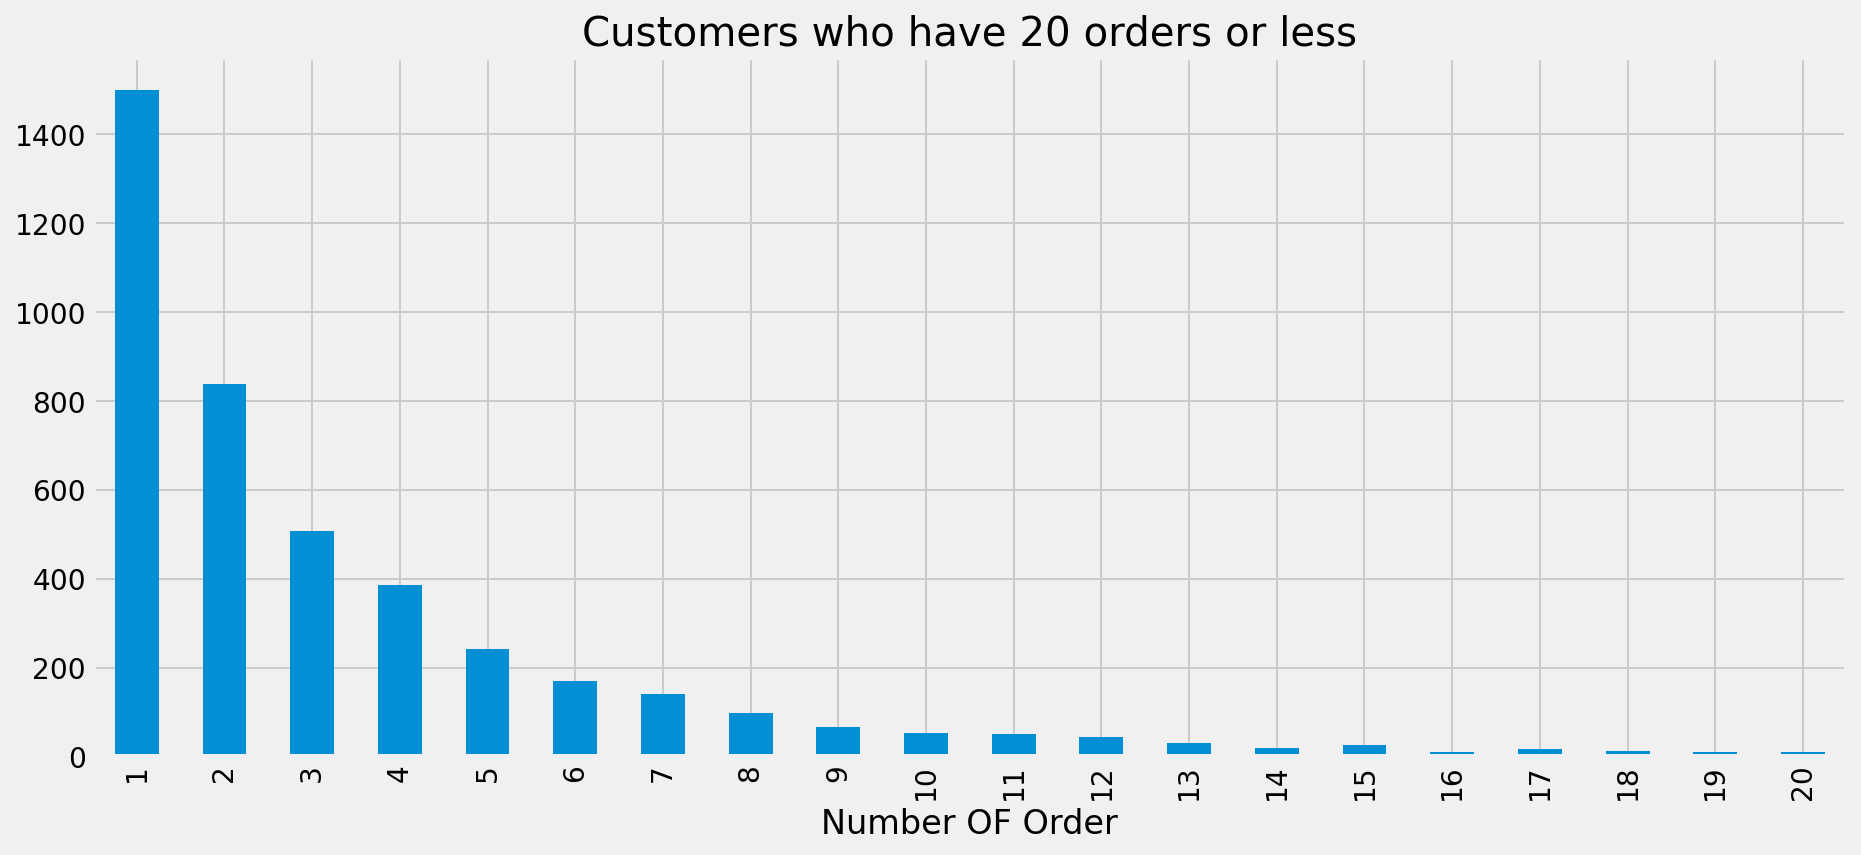

In [77]:
plt.figure(figsize=(14,6))
new_list['Total'].plot.bar(title="Customers who have 20 orders or less") 
plt.show()

In [78]:
# Most spending per customer

Total_vs_customer = data.groupby('CustomerID').Total.sum().sort_values(ascending=False)

In [79]:
Total_vs_customer.to_frame().head()

Total
CustomerID           
14646.0     280206.02
18102.0     259657.30
17450.0     194390.79
16446.0     168472.50
14911.0     143711.17

In [80]:
Fist_30_most_spending_customer = Total_vs_customer.to_frame().head(30)

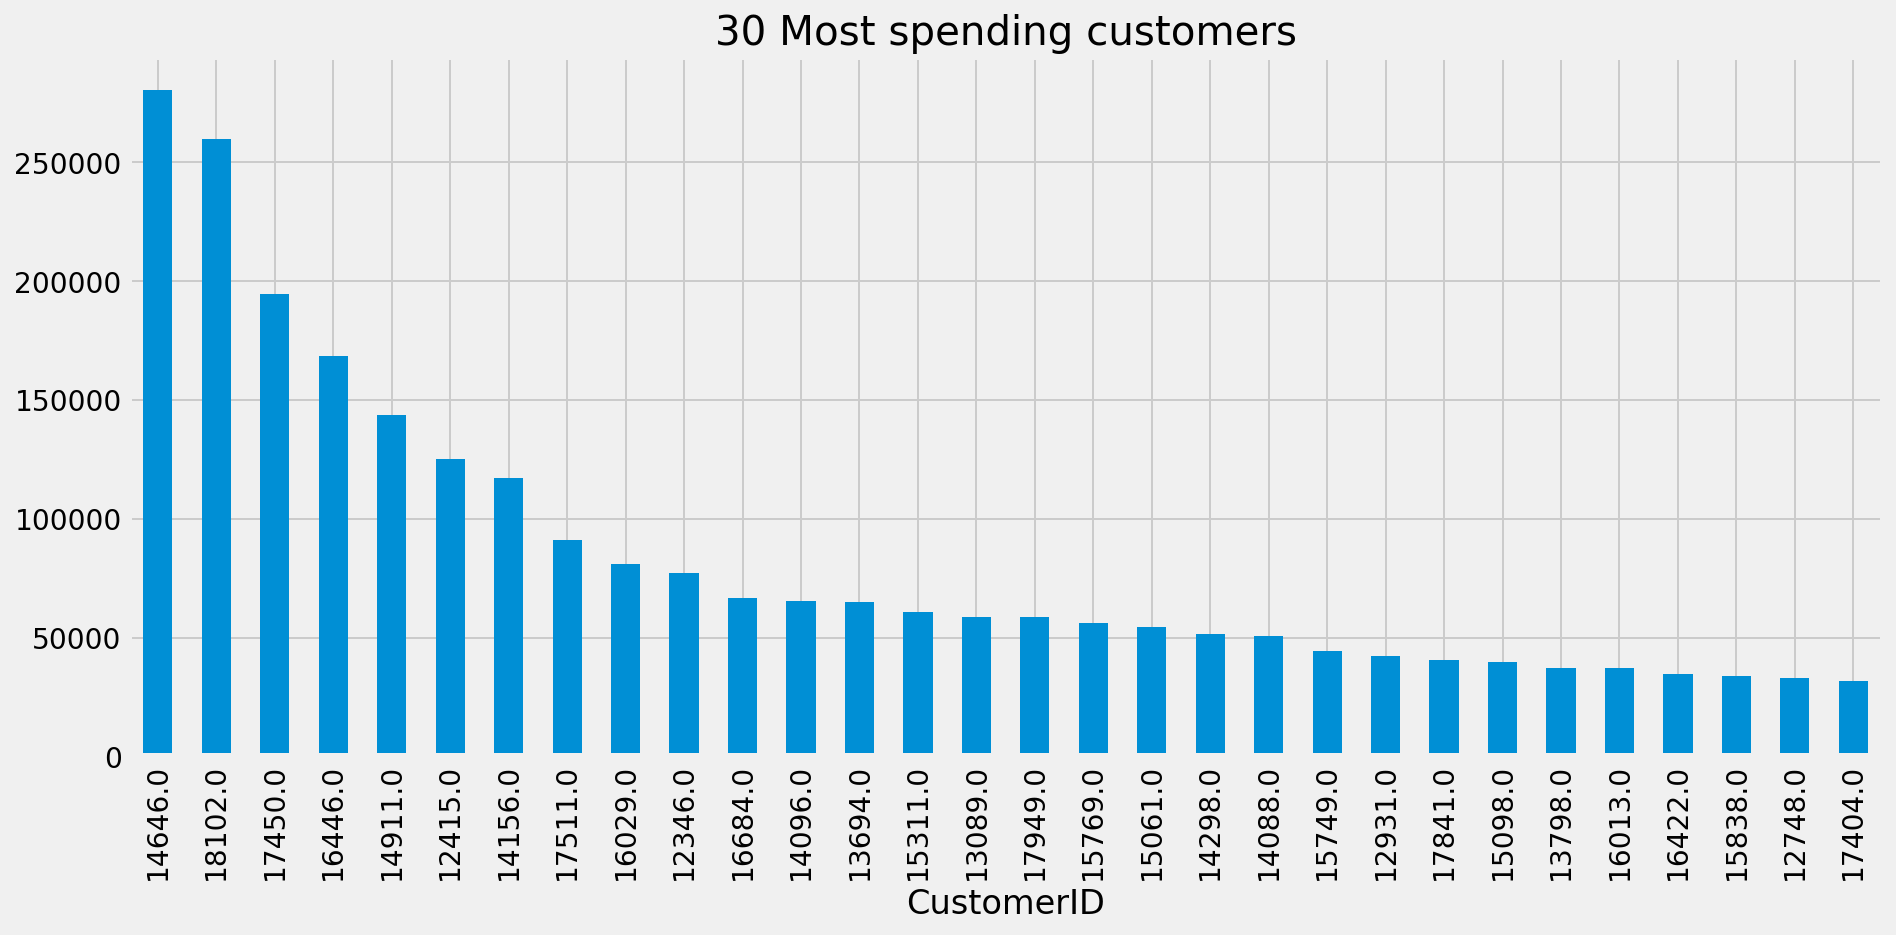

In [81]:
plt.figure(figsize=(14,6))
Fist_30_most_spending_customer['Total'].plot.bar(title="30 Most spending customers") 
plt.show()

### RFM Segmentation

##### Now let us apply RFM Segmentation

1.	Recency: How recently a customer has made a purchase
2.	Frequency: How often a customer makes a purchase
3.	Monetary Value: How much money a customer spends on purchases.

In [82]:
data.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   

        InvoiceDate  UnitPrice  CustomerID         Country  Total  
0  12/01/2010 08:26       2.55     17850.0  United Kingdom  15.30  
1  12/01/2010 08:26       3.39     17850.0  United Kingdom  20.34

Because our data base on the UK coustomers, and we can see the total customers in our data is 4338 and 3920 of them in the UK.

So, I will apply RFM Segmentation in UK custmoers  

In [83]:
UK_data = data[data["Country"] == "United Kingdom"].copy()

In [84]:
UK_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  Total  
0  12/01/2010 08:26       2.55     17850.0  United Kingdom  15.30  
1  12/01/2010 08:26       3.39     17850.0  United Kingdom  20.34  
2  12/01/2010 08:26       2.75     17850.0  United Kingdom  22.00  
3  12/01/2010 08:26       3.39     17850.0  United Kingdom  20.34  
4  12/01/2010 08:26       3.39     17850.0  United Kingdom  20.34

In [85]:
UK_data.shape

(349203, 9)

In [86]:
# save data after it is ready for RFM

#UK_data.to_csv('F:\GA\data\capstone_UK_data.csv', header = UK_data.columns, index=False)

let us take a look to total column to see customers spending info

In [87]:
UK_data[['Total']].describe().round(4)

Total
count  349203.0000
mean       20.8619
std       328.4173
min         0.0010
25%         4.2000
50%        10.2000
75%        17.8500
max    168469.6000

<AxesSubplot:>

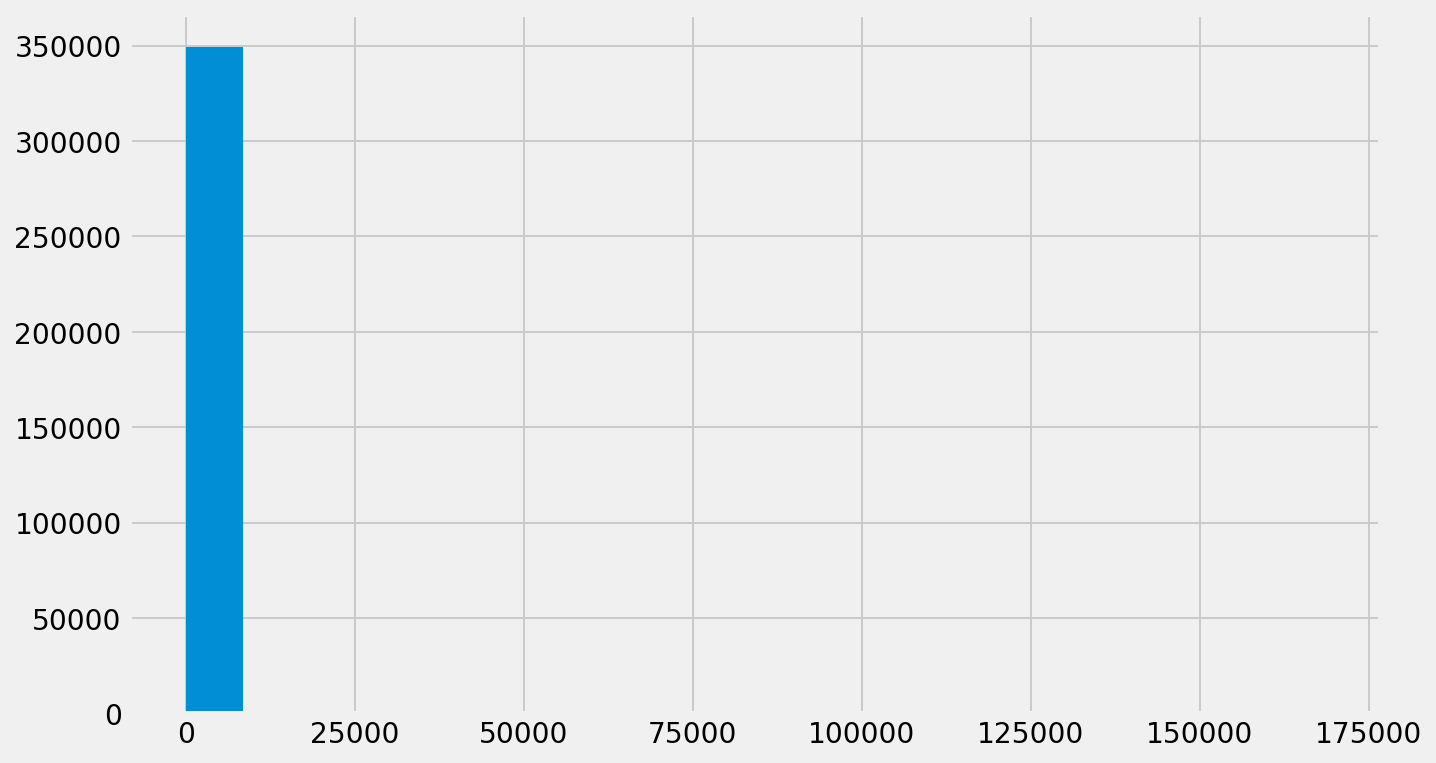

In [88]:
plt.figure(figsize=(10,6))
UK_data['Total'].hist(bins=20)


There is big different between (75% = 17.85) and (max = 168469.60) 


And the mean value is 20.86 and the standard deviation is 328.41
But the maximum value is 168469.60 This is a large value. 

Therefore, the Total values in the Top 25% of our data increase very rapidly from 17.85 to 168469.6

In [89]:
UK_data[UK_data['Total']> 17.8500].sort_values('Total',ascending=False)

InvoiceNo StockCode                          Description  Quantity  \
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   
61619     541431     23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
222680    556444     22502       PICNIC BASKET WICKER 60 PIECES        60   
173382    551697      POST                              POSTAGE         1   
348325    567423     23243  SET OF TEA COFFEE SUGAR TINS PANTRY      1412   
...          ...       ...                                  ...       ...   
103888    545081     22558      CLOTHES PEGS RETROSPOT PACK 24         12   
135993    547921     22558      CLOTHES PEGS RETROSPOT PACK 24         12   
104146    545150     22558      CLOTHES PEGS RETROSPOT PACK 24         12   
52157     540691     21673  WHITE SPOT BLUE CERAMIC DRAWER KNOB        12   
146792    549021     37448      CERAMIC CAKE DESIGN SPOTTED MUG        12   

             InvoiceDate  UnitPrice  CustomerID         Country      Total  
540421  12/09/2011 09:15       2.08     16446.0  United Kingdom  168469.60  
61619    1/18/2011 10:01       1.04     12346.0  United Kingdom   77183.60  
222680  06/10/2011 15:28     649.50     15098.0  United Kingdom   38970.00  
173382  05/03/2011 13:46    8142.75     16029.0  United Kingdom    8142.75  
348325   9/20/2011 11:05       5.06     17450.0  United Kingdom    7144.72  
...                  ...        ...         ...             ...        ...  
103888   2/28/2011 10:35       1.49     16057.0  United Kingdom      17.88  
135993   3/28/2011 13:28       1.49     14766.0  United Kingdom      17.88  
104146   2/28/2011 12:27       1.49     14227.0  United Kingdom      17.88  
52157   01/11/2011 08:50       1.49     17450.0  United Kingdom      17.88  
146792  04/05/2011 16:13       1.49     13468.0  United Kingdom      17.88  

[86004 rows x 9 columns]

In [90]:
#UK_data = UK_data[UK_data['Total']> 17.8500]

In [91]:
# convert InvoiceDate to datetim

UK_data['InvoiceDate'] = pd.to_datetime(UK_data['InvoiceDate'], utc=False)
UK_data['Date'] = UK_data['InvoiceDate'].apply(lambda x: x.date())

In [92]:
UK_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   

         Date  
0  2010-12-01  
1  2010-12-01  
2  2010-12-01  
3  2010-12-01  
4  2010-12-01

In [93]:
UK_data.shape

(349203, 10)

In [94]:
# find last day in the data

# add 1 day to make the data 1 day biger than last order
Last_date = (UK_data["InvoiceDate"].max()) + dt.timedelta(days=1)

print(Last_date)

2011-12-10 12:49:00


In [95]:
# find first day in the data

Start_date= UK_data["InvoiceDate"].min()
Start_date

Timestamp('2010-12-01 08:26:00')

In [96]:
# extract the data between first and last day ( 10.12.2010 to 09.12.2011 )

UK_data = UK_data[UK_data['InvoiceDate'] >= pd.to_datetime(Start_date)]
UK_data.reset_index(drop=True,inplace=True)

In [97]:
UK_data.shape

(349203, 10)

In [98]:
UK_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   

         Date  
0  2010-12-01  
1  2010-12-01  
2  2010-12-01  
3  2010-12-01  
4  2010-12-01

##### Segment the customers to levels by find (Recency, Frequency, Monetary) for each customer:

######        Recency = The difference between the last order customer make and the last day of the data
######        Frequency = Number of orders based on (InvoiceNo) done by each customer
######        Monetary = The total amount the customer spend during the period of the data

In [99]:
# create new data(rfm_data) contains (CustomerID 	recency 	frequency 	monetary) columns
# Using aggregate method and lambda function to find ('recency','frequency','monetary')
# grouping by 'CustomerID'

rfm_data = UK_data.groupby('CustomerID').agg({'InvoiceDate': lambda in_date: (Last_date - in_date.max()).days,
                                    'InvoiceNo': lambda invoice: invoice.count(),
                                    'Total': lambda total: total.sum()}).copy()

In [100]:
#change columns name
rfm_data.columns = ['recency','frequency','monetary']
rfm_data = rfm_data.reset_index()
rfm_data.head()

CustomerID  recency  frequency  monetary
0     12346.0      326          1  77183.60
1     12747.0        2        103   4196.01
2     12748.0        1       4412  33053.19
3     12749.0        4        199   4090.88
4     12820.0        3         59    942.34

In [101]:
rfm_data.shape

(3920, 4)

Apply qcut (Quantile-based discretization) function to RFM data to create score column for (Recency, Frequency, Monetary)

In [102]:
#https://regenerativetoday.com/pandas-cut-and-qcut-method-for-data-binning/

#pd.qcut(range(5), 3, labels=["good", "medium", "bad"])

#[good, good, medium, bad, bad]
#Categories (3, object): [good < medium < bad

In [103]:
# use qcut to divide recency to 5 scores with labels from 5 to 1.
# where Customers with the LOWEST recency considered as top customers

rfm_data['recency_score'] = pd.qcut(rfm_data['recency'],5,labels=[5,4,3,2,1])

In [104]:
# use qcut to divide frequency to 5 scores with labels from 1 to 5.
# where Customers with the HIGH Frequency considered as top customers

rfm_data['frequency_score'] = pd.qcut(rfm_data['frequency'].rank(method="first"),5,labels=[1,2,3,4,5])

In [105]:
# use qcut to divide monetary to 5 scores with labels from 1 to 5.
# where Customers with the HIGH Monetary considered as top customers

rfm_data['monetary_score'] = pd.qcut(rfm_data['monetary'],5,labels=[1,2,3,4,5])

In [106]:
rfm_data['RFM_Score'] = rfm_data[['recency_score','frequency_score','monetary_score']].sum(axis=1)

In [107]:
# Add RFM_segment column which is show us the combined concatenated score of RFM
#(recency_score-frequency_score-monetary_score)

rfm_data['RFM_segment'] = rfm_data['recency_score'].astype(str)+ rfm_data['frequency_score'].astype(str)+ rfm_data['monetary_score'].astype(str)

In [108]:
rfm_data.head(10)

CustomerID  recency  frequency  monetary recency_score frequency_score  \
0     12346.0      326          1  77183.60             1               1   
1     12747.0        2        103   4196.01             5               4   
2     12748.0        1       4412  33053.19             5               5   
3     12749.0        4        199   4090.88             5               5   
4     12820.0        3         59    942.34             5               4   
5     12821.0      214          6     92.72             1               1   
6     12822.0       71         46    948.88             3               3   
7     12823.0       75          5   1759.50             2               1   
8     12824.0       60         25    397.12             3               2   
9     12826.0        3         91   1474.72             5               4   

  monetary_score  RFM_Score RFM_segment  
0              5          7         115  
1              5         14         545  
2              5         15         555  
3              5         15         555  
4              4         13         544  
5              1          3         111  
6              4         10         334  
7              4          7         214  
8              2          7         322  
9              4         13         544

Find out RFM score segmentation

The score will by between 3 and 15, because:

     Lowest score is 3 = 1 Recency, 1 Frequency, 1 Monetary
     Highest score is 15 = 5 Recency, 5 Frequency, 5 Monetary

Find out the mean for each scoure in (Recency,Frequency,Monetary) and (count, sum) Monetary 

In [109]:
# group the data by RFM_SCORE and find mean, count, sum 

rfm_data.groupby('RFM_Score').agg({'recency': 'mean','frequency': 'mean','monetary': ['mean', 'count','sum'] }).round()

recency frequency monetary                 
             mean      mean     mean count        sum
RFM_Score                                            
3           274.0       6.0    129.0   228    29467.0
4           207.0      11.0    193.0   241    46464.0
5           185.0      16.0    278.0   324    90202.0
6           128.0      19.0    345.0   355   122372.0
7           108.0      26.0    915.0   348   318268.0
8            89.0      36.0    600.0   330   197909.0
9            68.0      45.0    852.0   338   288128.0
10           57.0      61.0   1006.0   321   322863.0
11           46.0      80.0   1956.0   301   588778.0
12           33.0     108.0   1669.0   293   489011.0
13           24.0     140.0   2890.0   286   826430.0
14           15.0     226.0   4113.0   273  1122812.0
15            5.0     426.0  10079.0   282  2842320.0

Divide the customer to groups (V_Vip, Vip, Loyal, Middle, Low)

In [110]:
# make function take data as parameter and divide the data to groups

def create_segment(df):
    if df['RFM_Score'] >= 14:#customers have scour 14,15
        return 'V_Vip'
    elif (df['RFM_Score'] >= 11) and (df['RFM_Score'] < 14):#customers have scour 11,12,13
        return 'Vip'
    elif (df['RFM_Score'] >= 8) and (df['RFM_Score'] < 11):#customers have scour 8,9,10
        return 'Loyal'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 8):#customers have scour 5,6,7
        return 'Middle'
    else:#customers have scour 3,4
        return 'Low'

In [111]:
# creat Segment_Level column and apply(create_segment) function to it

rfm_data['Segment_Level'] = rfm_data.apply(create_segment, axis=1)

In [112]:
# show the data with groups by Segment_Level column
# and find out the mean, count,sum of (recency ,frequency, monetary)

rfm_data.groupby('Segment_Level').agg({'recency': 'mean',
                                         'frequency': 'mean',
                                         'monetary': ['mean', 'count','sum']}).round()

recency frequency monetary                 
                 mean      mean     mean count        sum
Segment_Level                                            
Low             239.0       9.0    162.0   469    75931.0
Loyal            71.0      47.0    818.0   989   808901.0
Middle          139.0      21.0    517.0  1027   530842.0
V_Vip            10.0     328.0   7144.0   555  3965131.0
Vip              34.0     109.0   2164.0   880  1904219.0

In [113]:
rfm_data.head(10)

CustomerID  recency  frequency  monetary recency_score frequency_score  \
0     12346.0      326          1  77183.60             1               1   
1     12747.0        2        103   4196.01             5               4   
2     12748.0        1       4412  33053.19             5               5   
3     12749.0        4        199   4090.88             5               5   
4     12820.0        3         59    942.34             5               4   
5     12821.0      214          6     92.72             1               1   
6     12822.0       71         46    948.88             3               3   
7     12823.0       75          5   1759.50             2               1   
8     12824.0       60         25    397.12             3               2   
9     12826.0        3         91   1474.72             5               4   

  monetary_score  RFM_Score RFM_segment Segment_Level  
0              5          7         115        Middle  
1              5         14         545         V_Vip  
2              5         15         555         V_Vip  
3              5         15         555         V_Vip  
4              4         13         544           Vip  
5              1          3         111           Low  
6              4         10         334         Loyal  
7              4          7         214        Middle  
8              2          7         322        Middle  
9              4         13         544           Vip

In [114]:
#check the data for RFM_segment = 555

rfm_data[rfm_data['RFM_segment']=='555'].sort_values('monetary', ascending=False).head(10)

CustomerID  recency  frequency   monetary recency_score frequency_score  \
3783     18102.0        1        431  259657.30             5               5   
3314     17450.0        8        336  194390.79             5               5   
3356     17511.0        3        963   91062.38             5               5   
2766     16684.0        4        277   66653.56             5               5   
902      14096.0        4       5111   65164.79             5               5   
620      13694.0        4        568   65039.62             5               5   
1771     15311.0        1       2366   60632.75             5               5   
191      13089.0        3       1814   58762.08             5               5   
2109     15769.0        7        130   56252.72             5               5   
1579     15061.0        4        403   54534.14             5               5   

     monetary_score  RFM_Score RFM_segment Segment_Level  
3783              5         15         555         V_Vip  
3314              5         15         555         V_Vip  
3356              5         15         555         V_Vip  
2766              5         15         555         V_Vip  
902               5         15         555         V_Vip  
620               5         15         555         V_Vip  
1771              5         15         555         V_Vip  
191               5         15         555         V_Vip  
2109              5         15         555         V_Vip  
1579              5         15         555         V_Vip

In [115]:
#check the data for RFM_segment = 111

rfm_data[rfm_data['RFM_segment']=='111'].sort_values('monetary', ascending=False).head(10)

CustomerID  recency  frequency  monetary recency_score frequency_score  \
3045     17060.0      266          5    234.24             1               1   
688      13786.0      367          7    230.40             1               1   
634      13712.0      247         10    228.84             1               1   
180      13070.0      192          9    228.80             1               1   
3145     17212.0      253          4    226.85             1               1   
2618     16471.0      275         13    223.95             1               1   
2076     15724.0      201         11    218.25             1               1   
2731     16634.0      223          9    217.90             1               1   
59       12897.0      205          4    216.50             1               1   
14       12831.0      262          9    215.05             1               1   

     monetary_score  RFM_Score RFM_segment Segment_Level  
3045              1          3         111           Low  
688               1          3         111           Low  
634               1          3         111           Low  
180               1          3         111           Low  
3145              1          3         111           Low  
2618              1          3         111           Low  
2076              1          3         111           Low  
2731              1          3         111           Low  
59                1          3         111           Low  
14                1          3         111           Low

Number customer in each Segment_Level

In [116]:
N_Segment_Level = rfm_data["Segment_Level"].value_counts()
N_Segment_Level

Middle    1027
Loyal      989
Vip        880
V_Vip      555
Low        469
Name: Segment_Level, dtype: int64

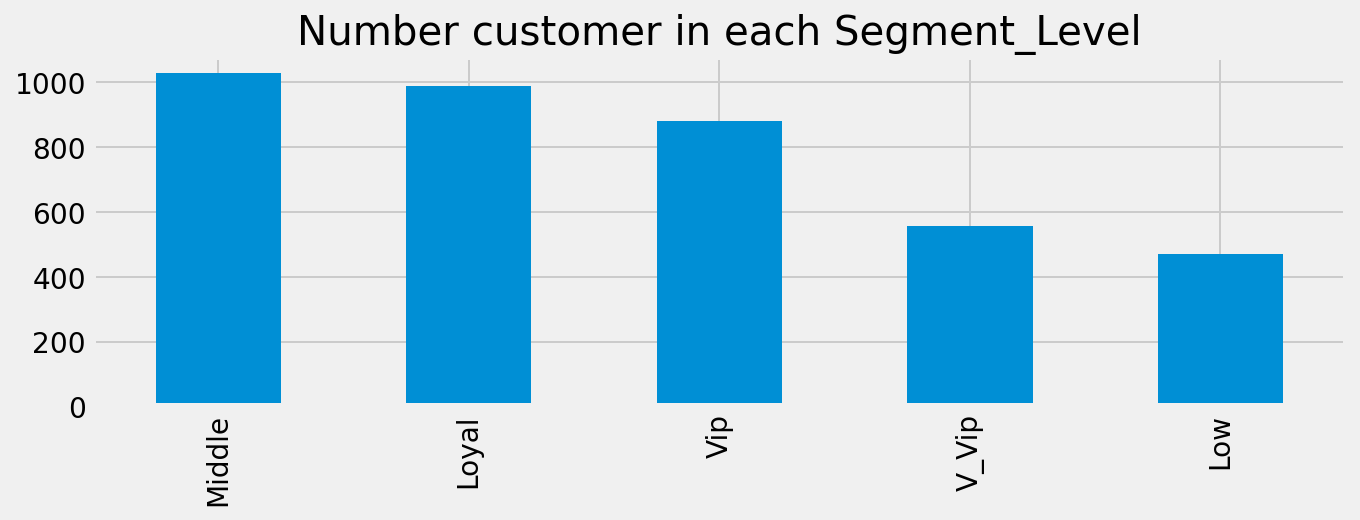

In [117]:
plt.figure(figsize=(10,3))
N_Segment_Level.plot.bar(title="Number customer in each Segment_Level") 
plt.show()

Average values(mean) for each RFM_Level, and (count,sum) for monetary

In [118]:
rfm_data.groupby('Segment_Level').agg({'recency': 'mean',
                                       'frequency': 'mean',
                                       'monetary': ['mean', 'count','sum']}).round(1)

recency frequency monetary                 
                 mean      mean     mean count        sum
Segment_Level                                            
Low             239.4       8.7    161.9   469    75930.7
Loyal            71.3      47.1    817.9   989   808900.8
Middle          138.9      20.5    516.9  1027   530842.2
V_Vip            10.1     327.6   7144.4   555  3965131.4
Vip              34.5     108.7   2163.9   880  1904219.5

### K-Means Segmentation

first we should minimize the sum of distance between the points and their respective cluster centroids

we need to normalize and scale the data in order to create these clusters out of the data points 

In [119]:
# check mean and variance (recency, frequency, monetary)

rfm_data[['recency','frequency','monetary']].describe()

recency    frequency       monetary
count  3920.000000  3920.000000    3920.000000
mean     92.208418    89.082398    1858.424654
std      99.533854   214.034542    7478.631256
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     298.185000
50%      51.000000    40.000000     644.975000
75%     143.000000    98.000000    1571.285000
max     374.000000  7676.000000  259657.300000

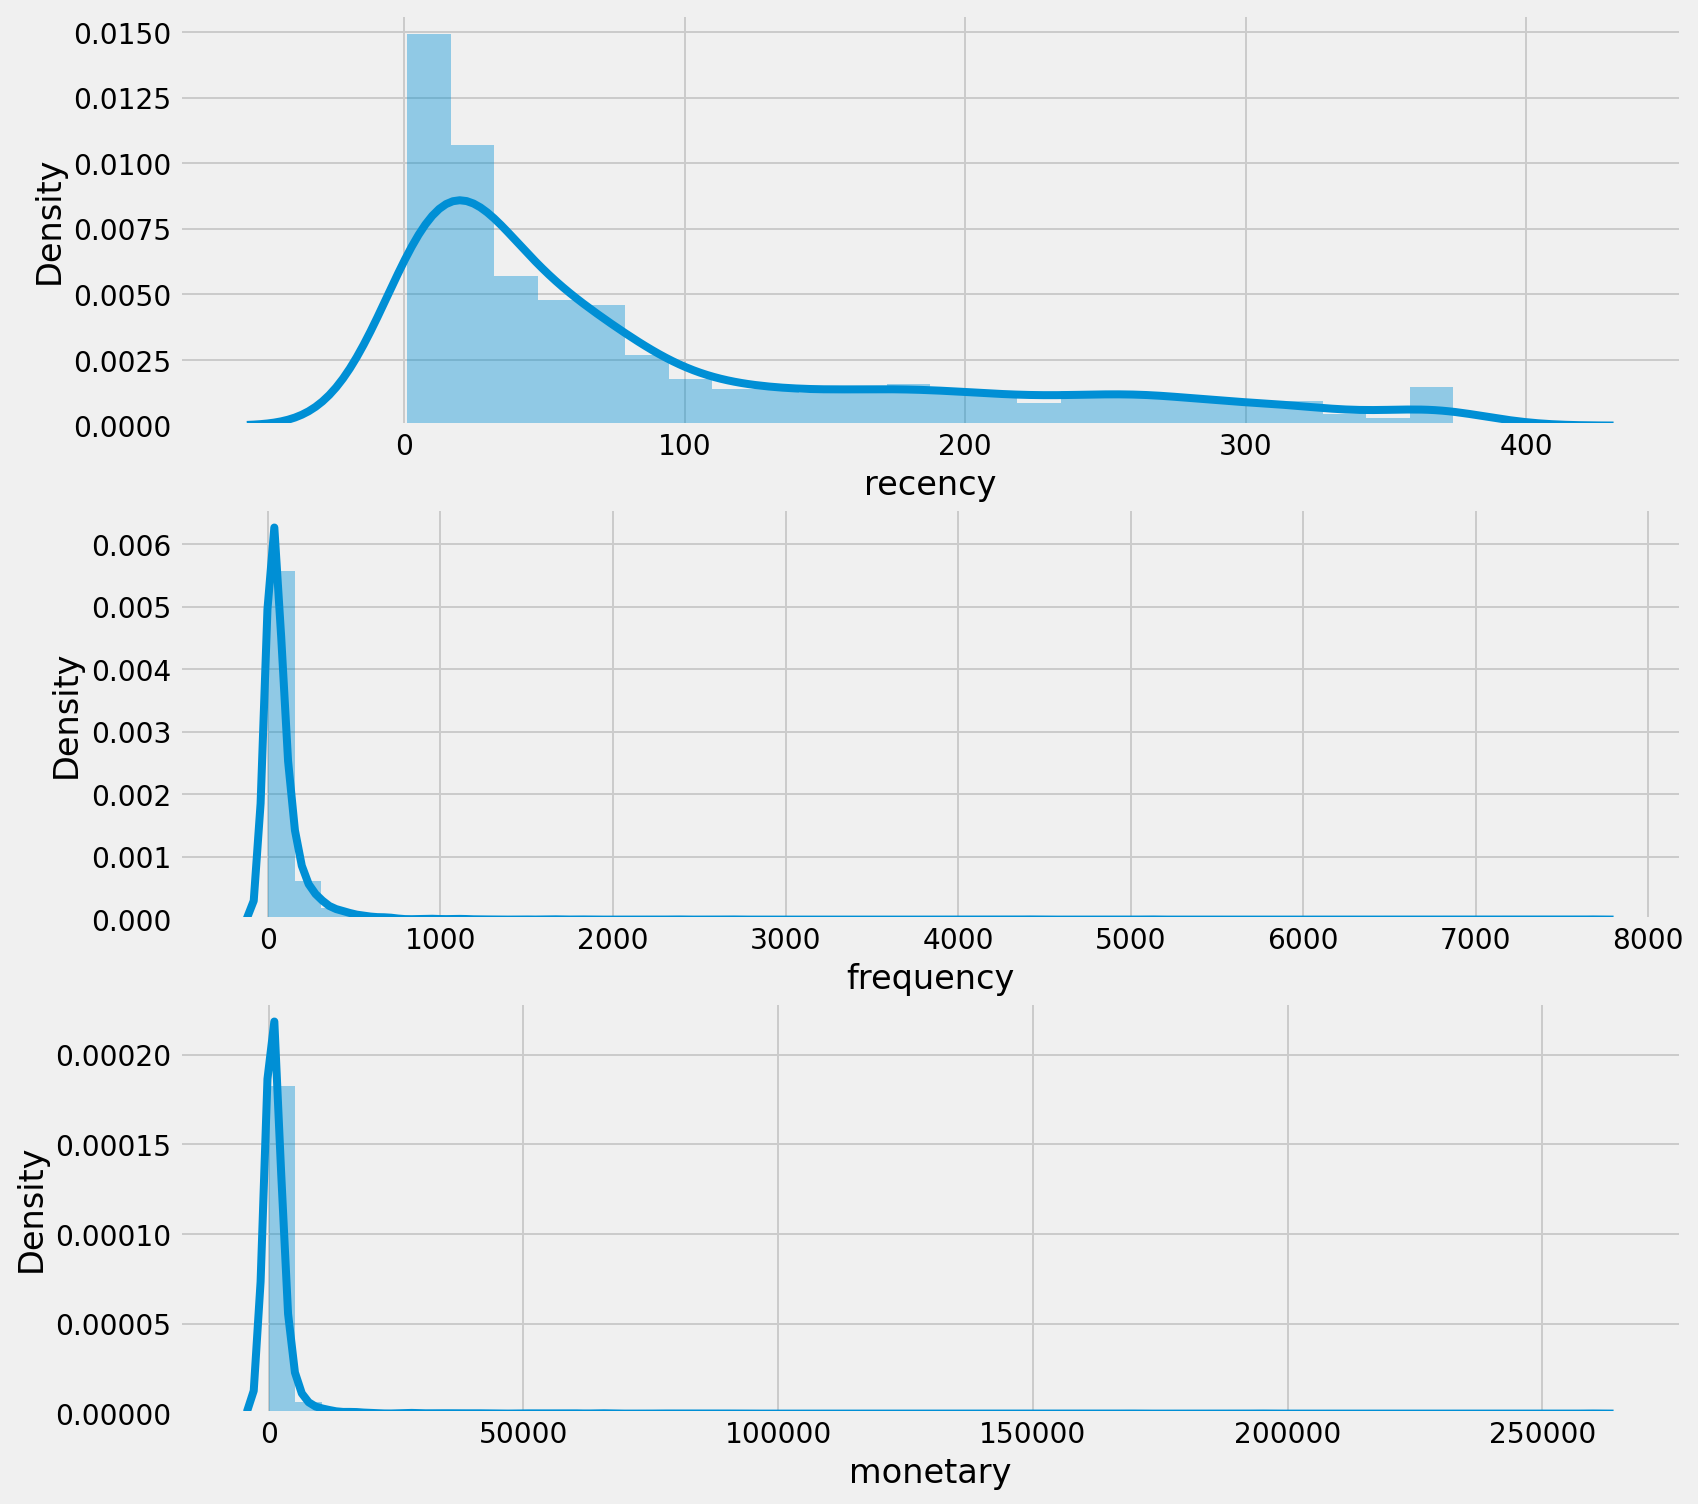

In [120]:
plt.figure(figsize=(12,12))

# Plot distribution of Recency
plt.subplot(3, 1, 1); sns.distplot(rfm_data['recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2); sns.distplot(rfm_data['frequency'])
# Plot distribution of Monetary
plt.subplot(3, 1, 3); sns.distplot(rfm_data['monetary'])
# Show the plot
plt.show()

We can see from the plot that the variables have no symmetrical distribution and skewed to the right.

### Normalization

To remove the skewness, we can apply log transformations

###### https://www.journaldev.com/46723/numpy-log-in-python
###### https://numpy.org/doc/stable/reference/generated/numpy.log.html
###### https://www.javatpoint.com/numpy-log

From the above description, we can see that we dose not have any 0 or negative value.
Because we can not use log transformation with negative values.

In [121]:
rfm_data.head()

CustomerID  recency  frequency  monetary recency_score frequency_score  \
0     12346.0      326          1  77183.60             1               1   
1     12747.0        2        103   4196.01             5               4   
2     12748.0        1       4412  33053.19             5               5   
3     12749.0        4        199   4090.88             5               5   
4     12820.0        3         59    942.34             5               4   

  monetary_score  RFM_Score RFM_segment Segment_Level  
0              5          7         115        Middle  
1              5         14         545         V_Vip  
2              5         15         555         V_Vip  
3              5         15         555         V_Vip  
4              4         13         544           Vip

In [122]:
clus_rfm_data = rfm_data[['recency',"frequency","monetary"]].copy()
clus_rfm_data .head()

recency  frequency  monetary
0      326          1  77183.60
1        2        103   4196.01
2        1       4412  33053.19
3        4        199   4090.88
4        3         59    942.34

In [123]:
# Apply Log transformation to normalize the data (normal distribution as possible (remove skew))

#n = clus_rfm_data[['recency', 'frequency', 'monetary']]
log_data = clus_rfm_data.apply(np.log, axis = 1).round(1)

In [124]:
log_data.head()

recency  frequency  monetary
0      5.8        0.0      11.3
1      0.7        4.6       8.3
2      0.0        8.4      10.4
3      1.4        5.3       8.3
4      1.1        4.1       6.8

Scaling

In [125]:
# initialize a standard scaler 
scaler = StandardScaler()

# fit standard scaler
scaler.fit(log_data)

# transform the data(scale and center)
scaler.transform(log_data)

# create a pandas DataFrame
#data_std = pd.DataFrame(data=log_data, index=new_c.index, columns=new_c.columns)
data_standardScaler = pd.DataFrame(log_data)

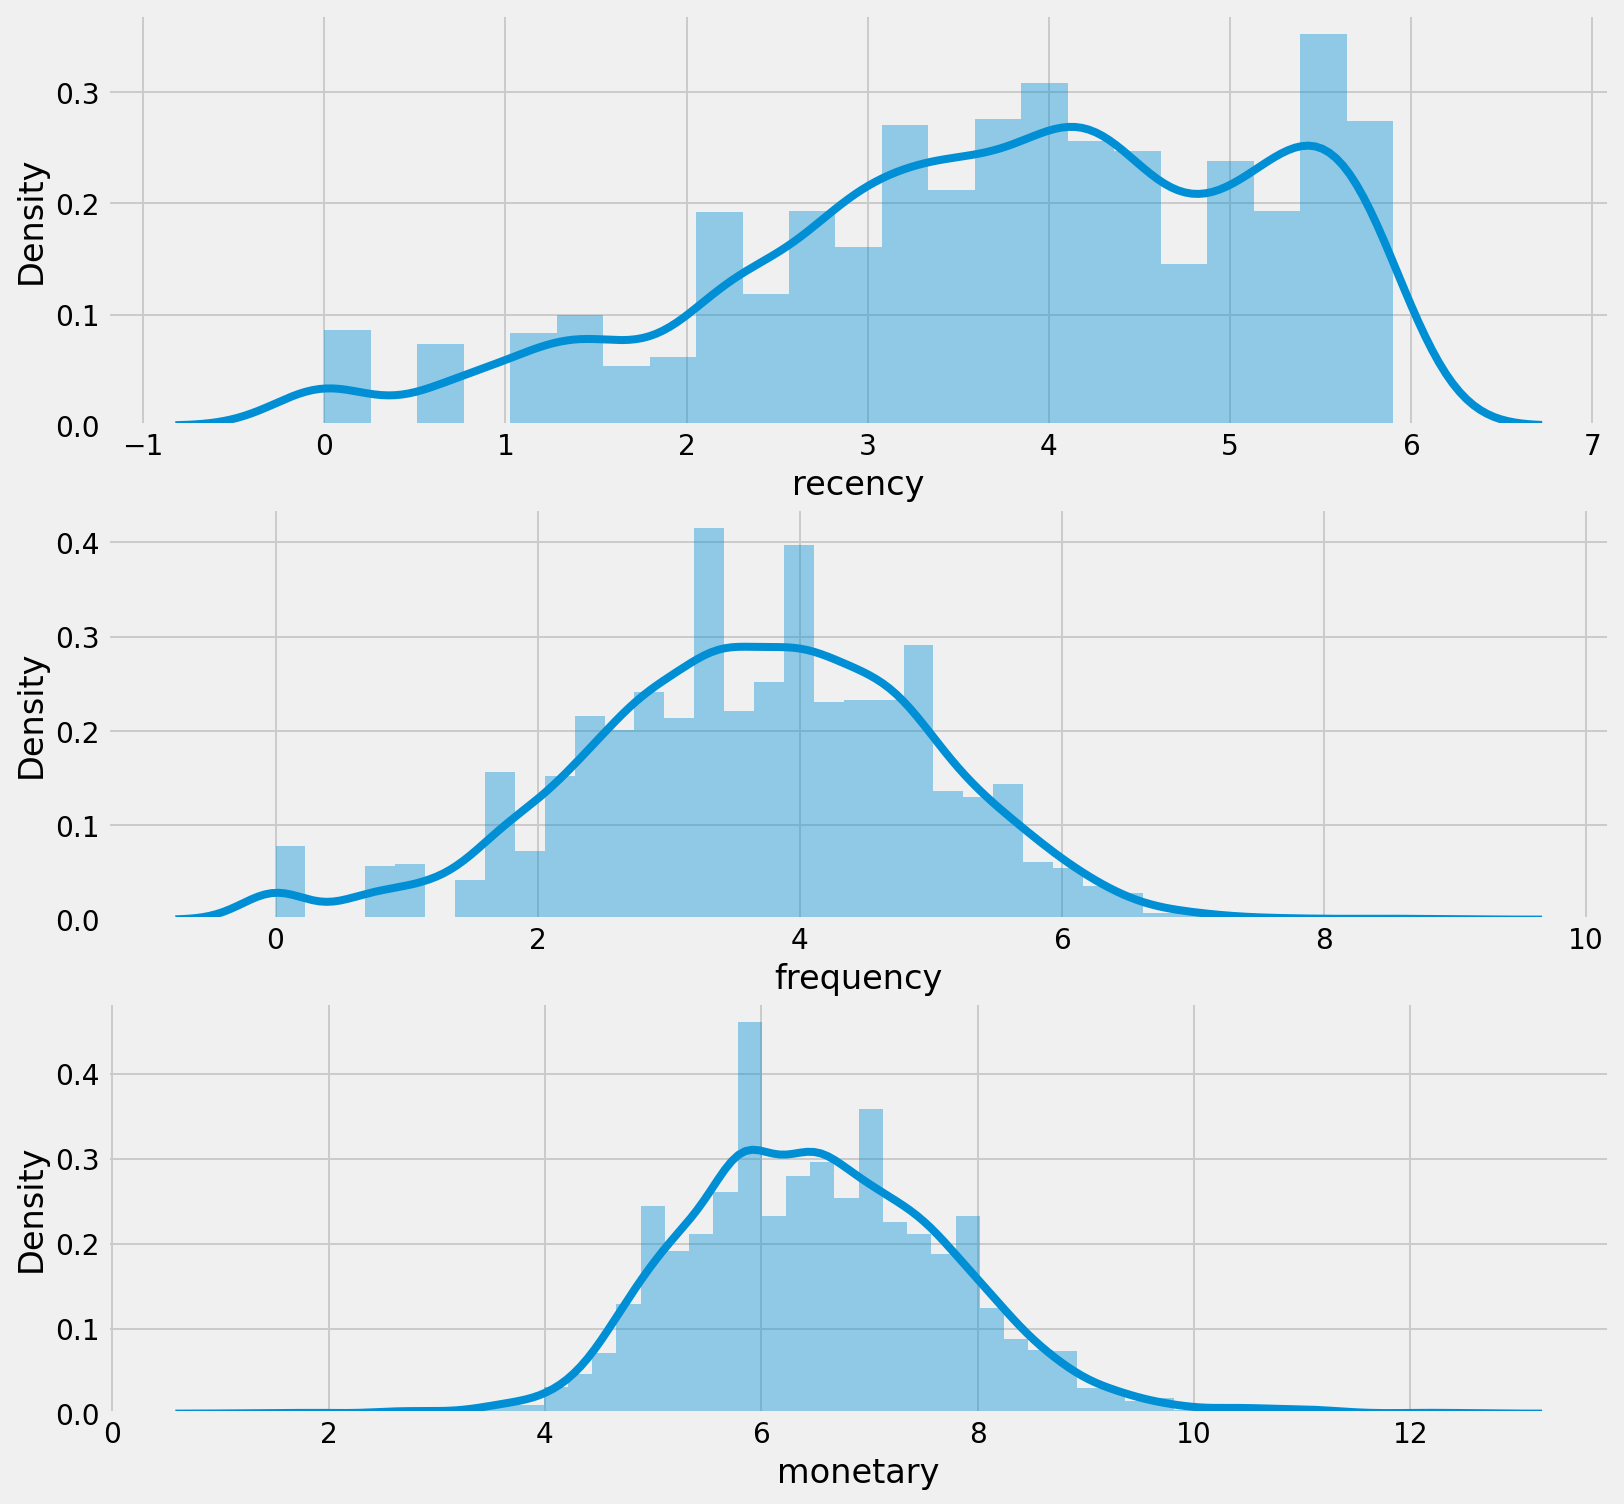

In [130]:
plt.figure(figsize=(12,12))
# Plot distribution of Recency
plt.subplot(3, 1, 1); sns.distplot(data_standardScaler['recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2); sns.distplot(data_standardScaler['frequency'])
# Plot distribution of Monetary
plt.subplot(3, 1, 3); sns.distplot(data_standardScaler['monetary'])
# Show the plot
plt.show()

### K-means Clustering

Produce an elbow plot and decide on a suitable number of clusters

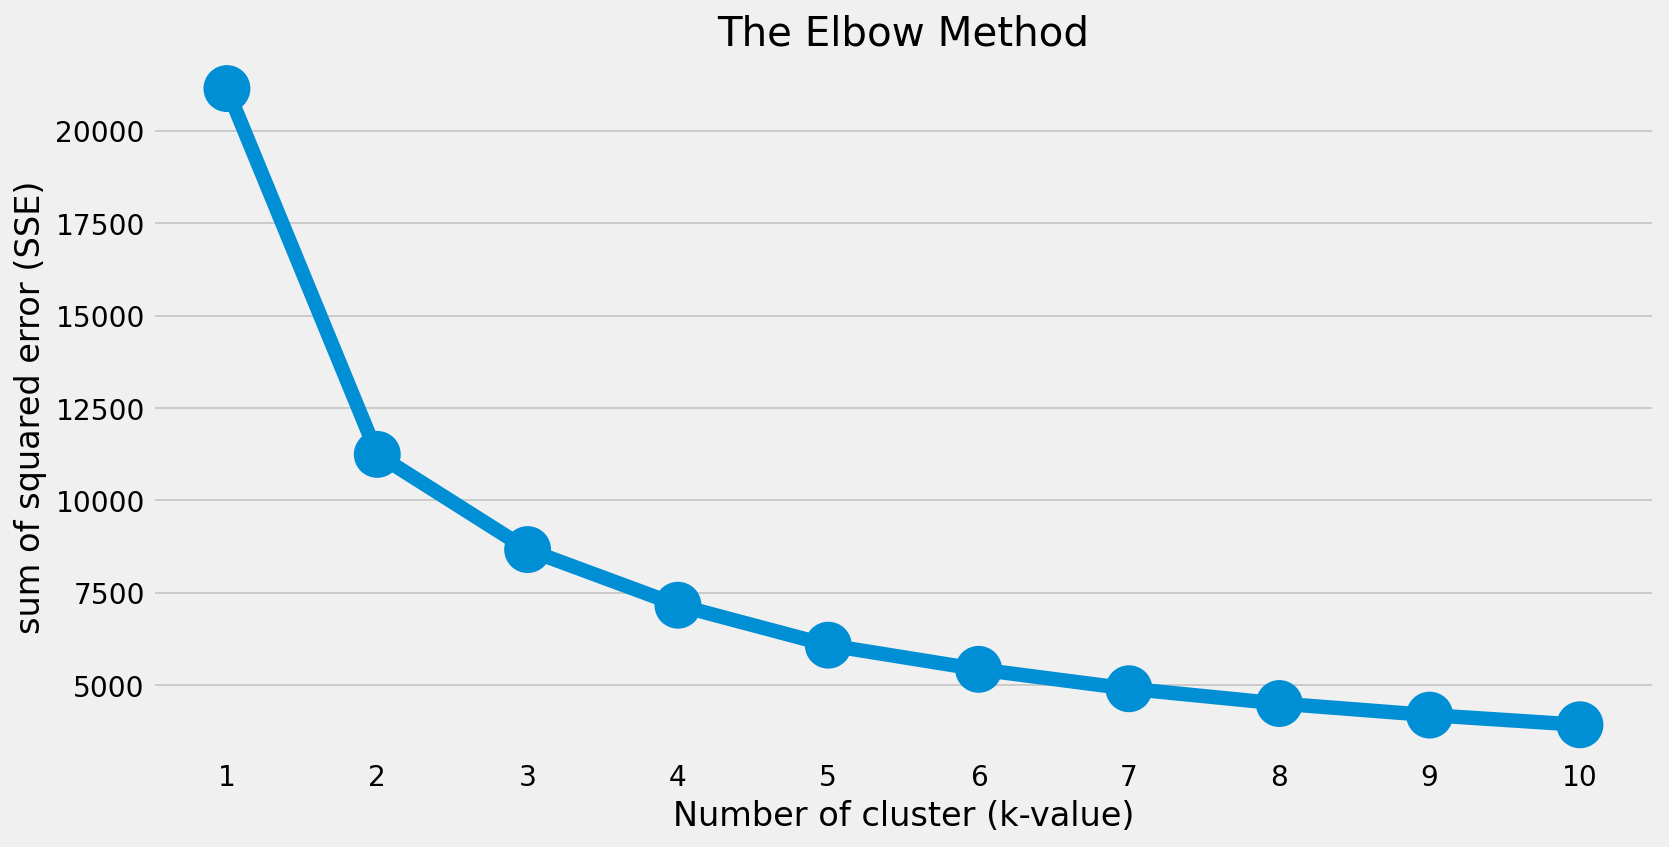

In [131]:
#creat impty dic to fill in with key = n_clusters and value = sum of squared distances of (n_clusters)k
sse = {}

# Fit KMeans and calculate sse for each k from 1 to 20
for k in range(1, 11):
  
    # Initialize KMeans with k clusters
    model_t = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    model_t.fit(data_standardScaler)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = model_t.inertia_ # sse to closest cluster centroid

plt.figure(figsize=(12,6))
plt.title('The Elbow Method')
plt.xlabel('Number of cluster (k-value)')
plt.ylabel('sum of squared error (SSE)')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [132]:
sse

{1: 21140.66896938776,
 2: 11245.045303954856,
 3: 8670.181599651696,
 4: 7165.518844996128,
 5: 6084.291587983499,
 6: 5431.190709020149,
 7: 4905.892889044916,
 8: 4505.886376413142,
 9: 4192.668703972958,
 10: 3930.9433691559484}

Another way to plot elbow to find suitable number of clusters

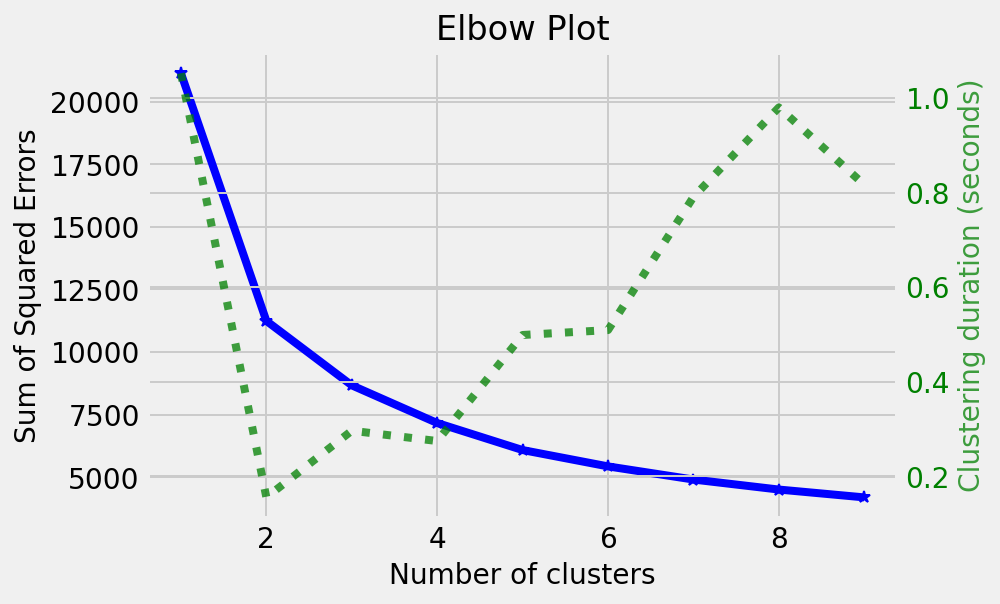

In [133]:
plot_elbow_curve(model_t, data_standardScaler, cluster_ranges=range(1, 10))
plt.show()

Use the silhouette score to determine an optimal number of clusters

In [134]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.colors import ListedColormap
from scikitplot.metrics import plot_silhouette
import matplotlib.cm as cm

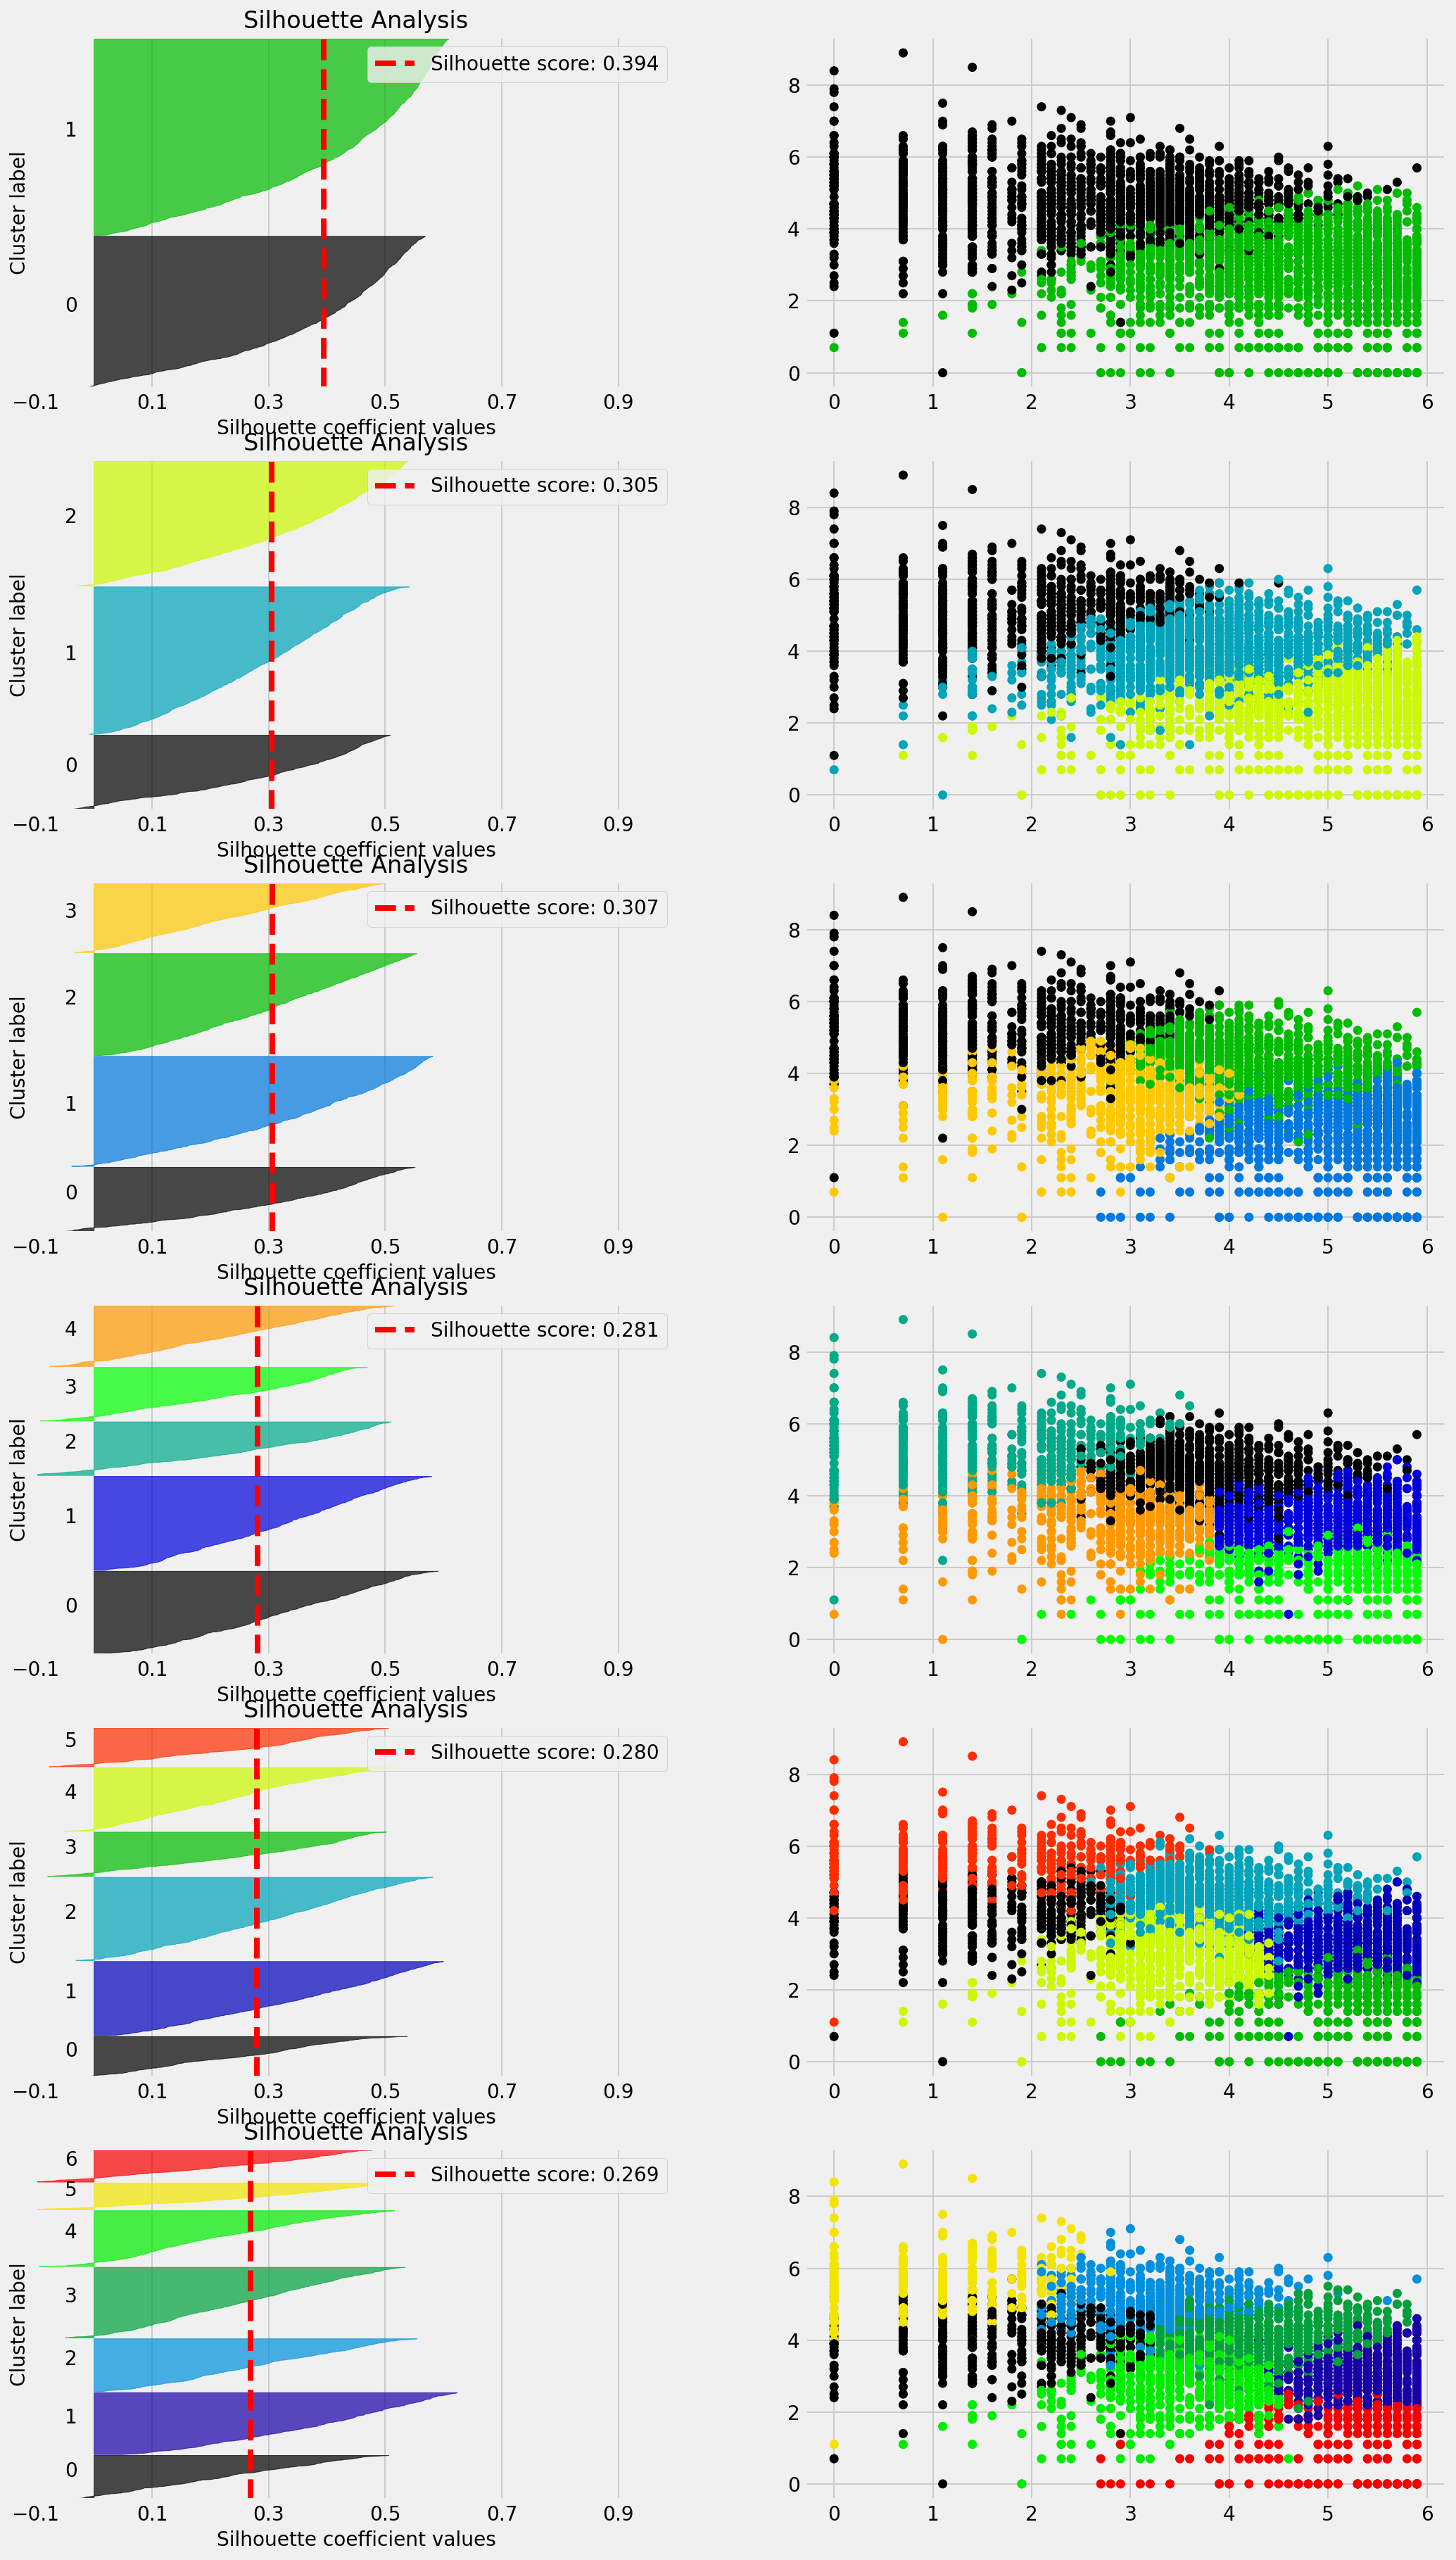

In [135]:
silhouette = []

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(16, 30))

for k in range(2, 8):

    model_k = KMeans(n_clusters=k, random_state=1)
    labels_k = model_k.fit_predict(data_standardScaler)
    silhouette.append((k, silhouette_score(data_standardScaler, labels_k)))

    colors = cm.nipy_spectral(labels_k.astype(float) / k)
    plot_silhouette(data_standardScaler, labels_k, ax=ax[k-2, 0])
    ax[k-2, 1].scatter(data_standardScaler.iloc[:, 0], data_standardScaler.iloc[:, 1], color=colors)

silhouette = np.array(silhouette)

I think that the best number of cluster is (3 or 4) whene the elbow occuring

In [136]:
from sklearn.metrics import silhouette_samples, silhouette_score

def get_silhouette_score(Xstd, n_clusters):
    data_sample = Xstd.sample(frac=0.2, random_state=1)
    model = KMeans(n_clusters=n_clusters, random_state=1)
    model.fit(data_sample)
    
    model_sil_score = silhouette_score(data_sample, model.labels_)
    
    print(f"The silhouette score using {n_clusters} number of clusters is: {round(model_sil_score, 3)}")

In [137]:
get_silhouette_score(data_standardScaler, 3)
get_silhouette_score(data_standardScaler, 4)
get_silhouette_score(data_standardScaler, 5)

The silhouette score using 3 number of clusters is: 0.317
The silhouette score using 4 number of clusters is: 0.315
The silhouette score using 5 number of clusters is: 0.288


The silhouette score is pretty much indifferent between using 3, 4 clusters

start with n_clusters = 3

In [138]:
clus_rfm_data.head()

recency  frequency  monetary
0      326          1  77183.60
1        2        103   4196.01
2        1       4412  33053.19
3        4        199   4090.88
4        3         59    942.34

In [139]:
model_n3 = KMeans(n_clusters=3, random_state=1)

# Compute k-means clustering on pre-processed data
model_n3.fit(data_standardScaler)

# Extract cluster labels from labels_ attribute
cluster_labels_3 = model_n3.labels_

In [140]:
# Create a cluster label column in the original DataFrame
data_k3 = clus_rfm_data.assign(Cluster = cluster_labels_3)

# see average RFM values for each cluster
k3 = data_k3.groupby(['Cluster']).agg({'recency': 'mean',
                                       'frequency': 'mean',
                                       'monetary': ['mean', 'count','sum'],}).round()

In [141]:
k3

recency frequency monetary                 
           mean      mean     mean count        sum
Cluster                                            
0          11.0     250.0   5735.0   849  4869365.0
1          65.0      69.0   1201.0  1664  1998892.0
2         173.0      15.0    296.0  1407   416768.0

In [142]:
pred_3 = model_n3.predict(data_standardScaler)
pred_3

array([1, 0, 0, ..., 1, 0, 1])

In [143]:
from sklearn.metrics import silhouette_score
score = silhouette_score (data_standardScaler, model_n3.labels_)
print("Score = ", score)

Score =  0.30509441330072257


n_clusters = 4

In [144]:
# 
model_n4 = KMeans(n_clusters=4, random_state=1)

# Compute k-means clustering on pre-processed data
model_n4.fit(data_standardScaler)

# Extract cluster labels from labels_ attribute
cluster_labels_4 = model_n4.labels_

In [145]:
# Create a cluster label column in the original DataFrame
data_k4 = clus_rfm_data.assign(Cluster = cluster_labels_4)

# see average RFM values for each cluster
k4 = data_k4.groupby(['Cluster']).agg({'recency': 'mean',
                                       'frequency': 'mean',
                                       'monetary': ['mean', 'count','sum'],}).round()

In [146]:
k4

recency frequency monetary                 
           mean      mean     mean count        sum
Cluster                                            
0          10.0     275.0   6341.0   740  4692277.0
1         187.0      15.0    293.0  1245   364476.0
2          91.0      86.0   1555.0  1153  1792839.0
3          21.0      36.0    557.0   782   435434.0

we can see that, the clusters divided to 4 levels:

0 (VIP Customers): 
                    
                  Recently made orders with average(10 day)
                  Most fequent orders with average(275 orders)
                  Highest monetary spending with average(£6341) and monetary sum (4,692,277)

1 (Low Customers):
                    
                 Orders made a while ago with average(187 day)
                 Less fequent orders with average(15orders)
                 Low monetary spending with average(£293) and monetary sum (364,476)

2 (Middle Custmoers): 

                 Orders made with average(91 day)
                 Less fequent orders with average(86 orders)
                 Low monetary spending with average(£1555) and monetary sum (1,792,839)

3 (Loyal Custmoers):

                Orders made with average(21 day)
                Less fequent orders with average(36 orders)
                Low monetary spending with average(£ 557)and monetary sum (435,434)

In [147]:
pred_4 = model_n4.predict(data_standardScaler)
pred_4

array([2, 0, 0, ..., 3, 0, 2])

In [148]:
np.unique(model_n4.labels_)

array([0, 1, 2, 3])

In [149]:
from sklearn.metrics import silhouette_score
score = silhouette_score (data_standardScaler, model_n4.labels_)
print("Score = ", score)

Score =  0.306570882501349


In [150]:
y_kmeans = model_n4.predict(data_standardScaler)
y_kmeans[30:50]

array([1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 3, 1, 3])

In [151]:
d_frame = pd.DataFrame(data_standardScaler)
d_frame['cluster'] = y_kmeans
d_frame['cluster'].value_counts()

1    1245
2    1153
3     782
0     740
Name: cluster, dtype: int64

In [179]:
data_standardScaler.head(2)

recency  frequency  monetary  cluster
0      5.8        0.0      11.3        2
1      0.7        4.6       8.3        0

In [162]:
data_k4.head(2)

recency  frequency  monetary  Cluster
0      326          1  77183.60        2
1        2        103   4196.01        0

In [180]:
new_data_k4 = data_standardScaler.copy()

In [181]:
new_data_k4.index = rfm_data['CustomerID'].astype(int)

In [182]:
new_data_k4.head(2)

recency  frequency  monetary  cluster
CustomerID                                       
12346           5.8        0.0      11.3        2
12747           0.7        4.6       8.3        0

In [184]:
# Melt the data into along format so RFM values and metric names are stored in 1 column each
data_melt = pd.melt(new_data_k4.reset_index(),
                    id_vars=['CustomerID', 'cluster'],
                    value_vars=['recency', 'frequency', 'monetary'],
                    var_name='Attribute',
                    value_name='Value')

<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

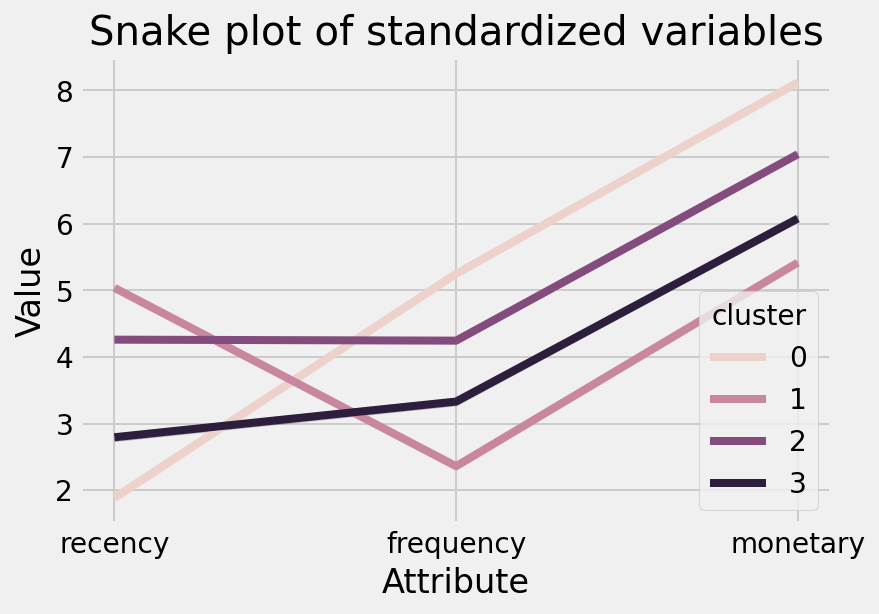

In [186]:

plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='cluster', data=data_melt)

Plot Hierarchical Clustering Dendrogram (clustering tree)

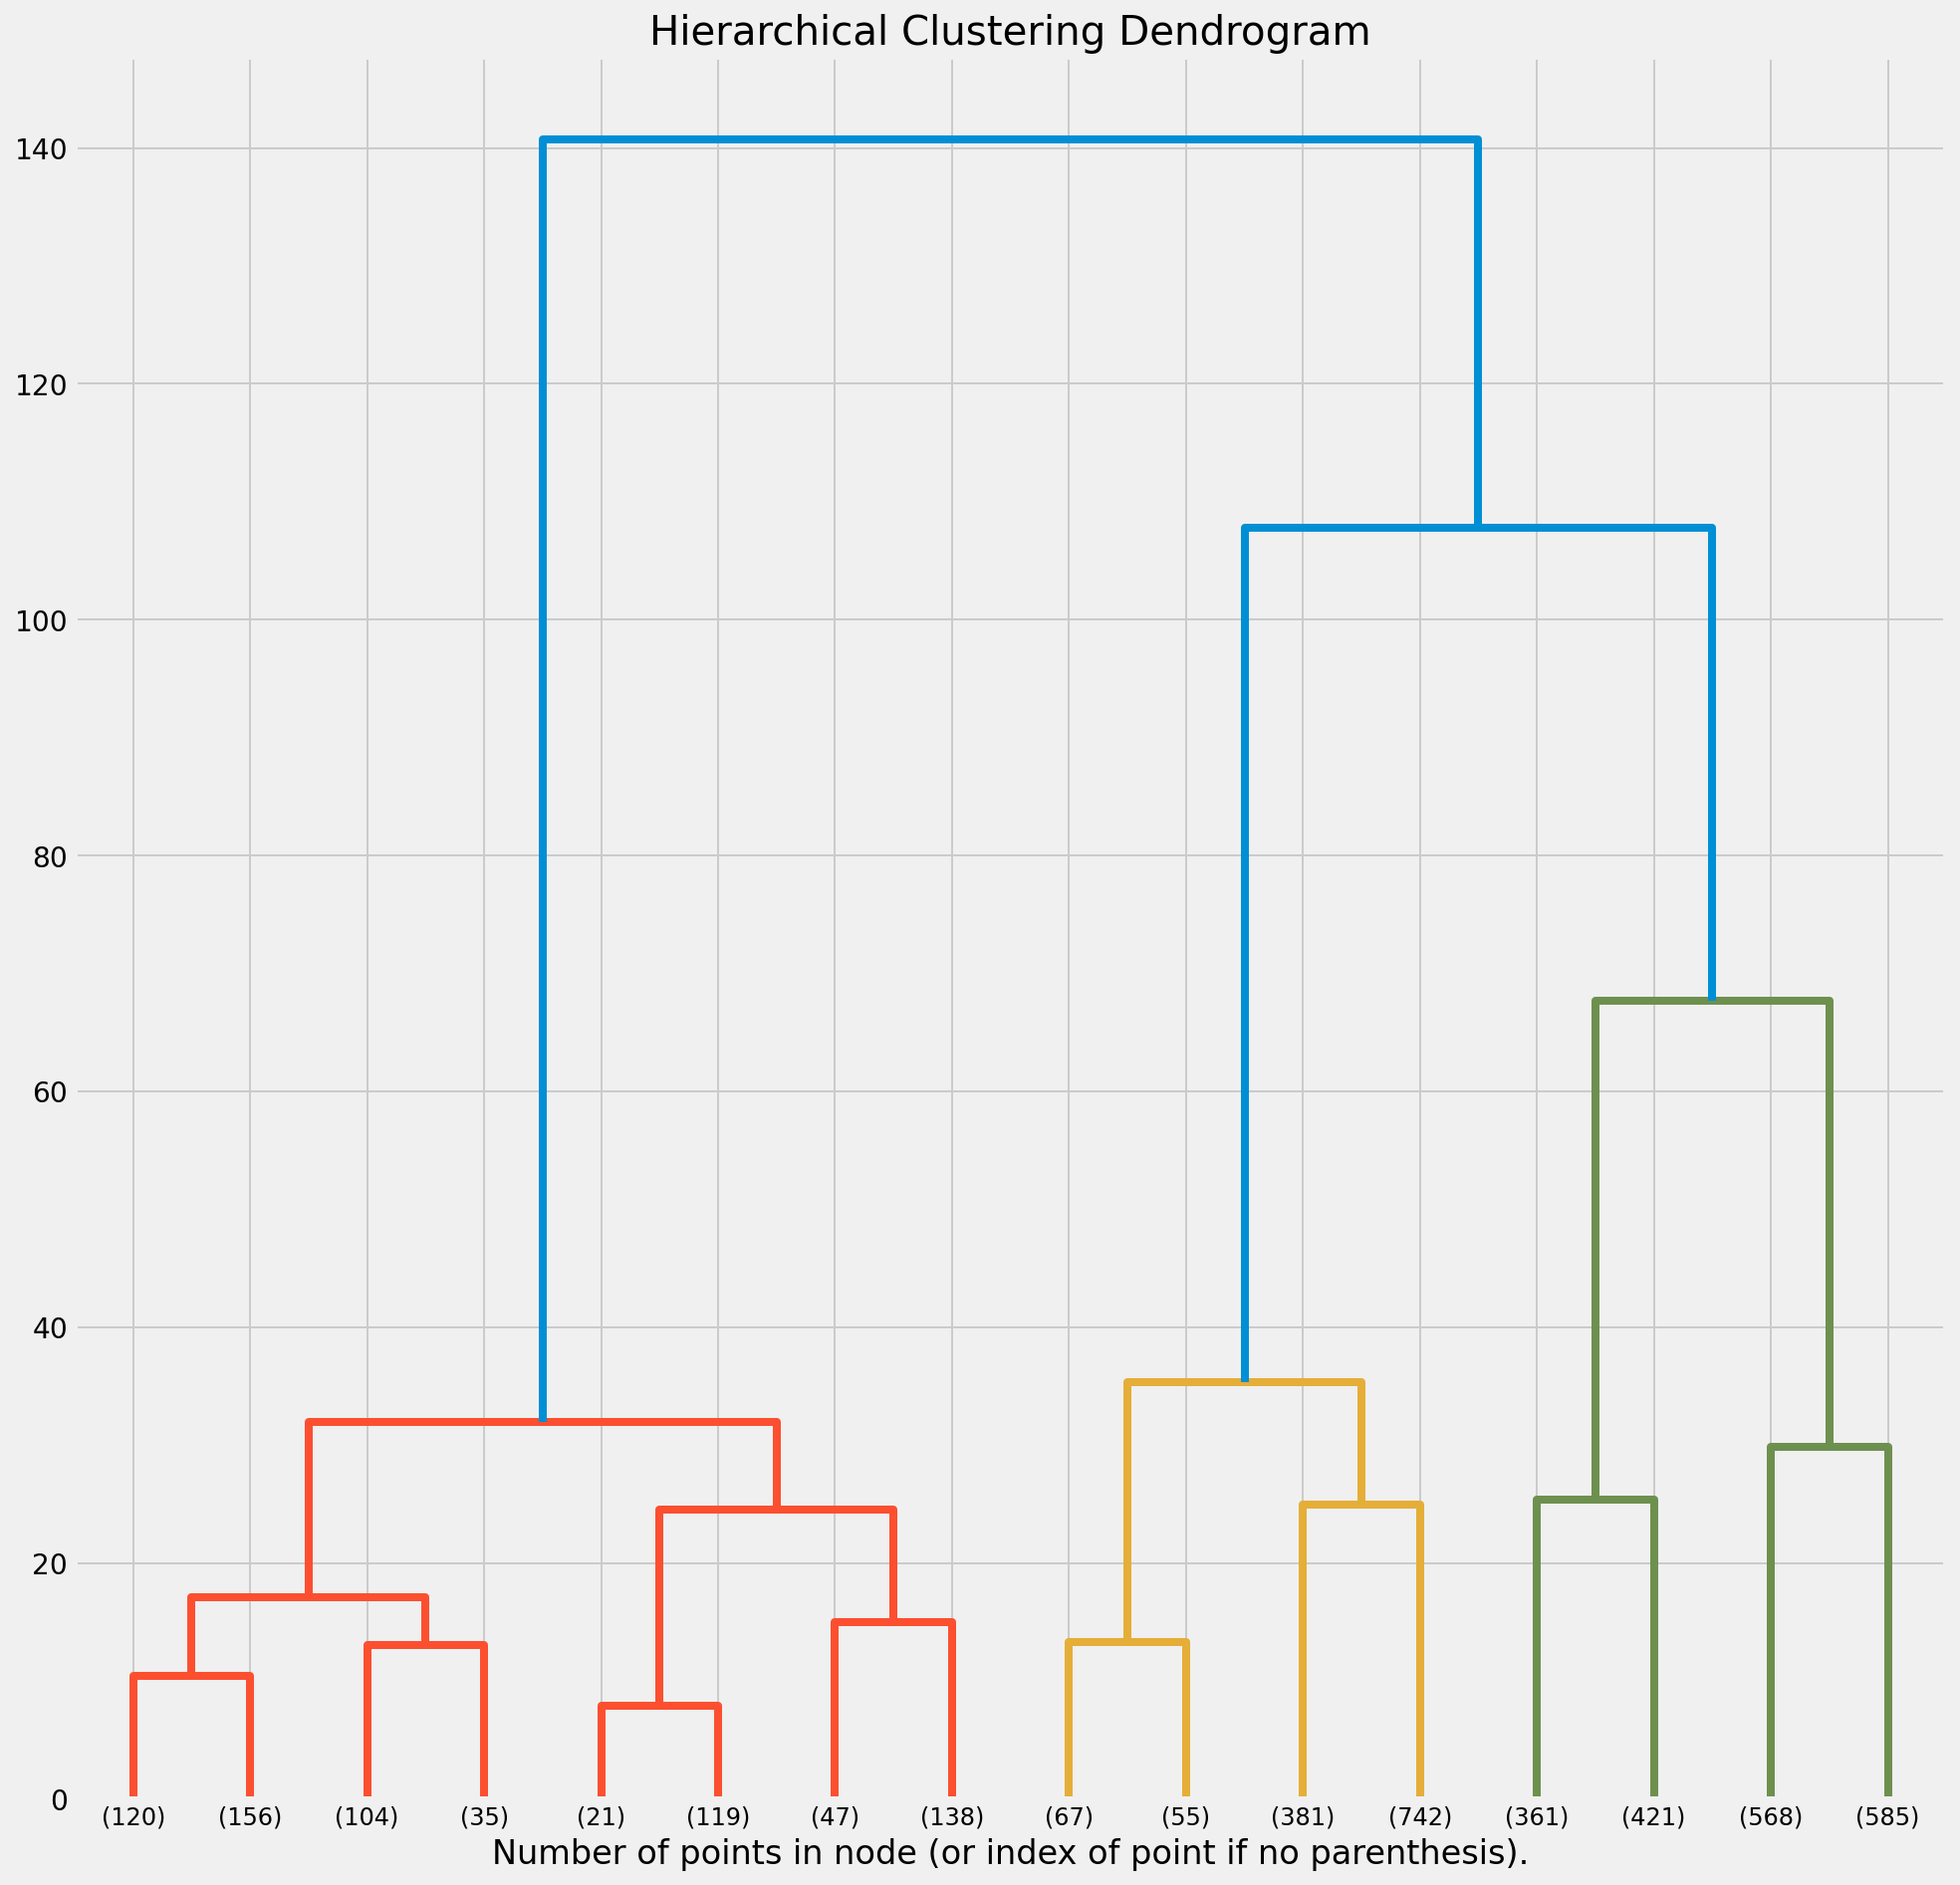

In [152]:
# source https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
modelll = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='ward')

modelll = modelll.fit(data_standardScaler)
plt.figure(figsize=(15,15))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(modelll, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Produce a scatter of the data colored according to their labels and together with the calculated centroids.

In [153]:
centroids = model_n4.cluster_centers_
centroids

array([[1.88809202, 5.25101488, 8.1217862 ],
       [5.03678715, 2.35935743, 5.41566265],
       [4.25980903, 4.24427083, 7.04175347],
       [2.79209184, 3.33022959, 6.07984694]])

In [154]:
data_standardScaler

recency  frequency  monetary  cluster
0         5.8        0.0      11.3        2
1         0.7        4.6       8.3        0
2         0.0        8.4      10.4        0
3         1.4        5.3       8.3        0
4         1.1        4.1       6.8        0
...       ...        ...       ...      ...
3915      5.6        2.3       5.2        1
3916      5.2        1.9       4.4        1
3917      2.1        2.5       5.2        3
3918      1.4        6.6       7.6        0
3919      3.8        4.2       7.5        2

[3920 rows x 4 columns]

In [155]:
options(repr.plot.width == 16, repr.plot.height == 7)
ggplot(data_standardScaler,
       aes(x=recency, y=frequency,
           color=Cluster)) +geom_point() + theme(legend.position == "bottom",
                                                 legend.text=element_text(size=25),
                                                 axis.title = element_text(size = 20))

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-155-ad9db7389348>, line 5)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
data_standardScaler.plot(kind='scatter', x=features[0], y=features[1], c='cluster', colormap='Spectral', ax=ax, colorbar=False)
ax.scatter(centroids[:,0], centroids[:,1], marker='o', s=150, alpha=.7, c=range(0, model_n4.n_clusters), 
            cmap='Spectral')
plt.show()
plot_elbow_curve(model_n4, data_standardScaler, cluster_ranges=range(1, 11))
plt.show()

A look at the cluster centroids & labelling

In [ ]:
data_standardScaler

In [ ]:
model_n4_centroids = pd.DataFrame(model_n4.cluster_centers_, columns=['recency','frequency','monetary'])
display(model_n4_centroids)

plt.figure(figsize=(10, 6))
sns.heatmap(model_n4_centroids.T, cmap="Blues")
plt.xlabel("Cluster centroids", fontsize=14)
plt.title("Centroid positions in high-dimensional space", fontsize=15)

Try to use LogisticRegression model in the data

In [156]:
data_standardScaler.head()

recency  frequency  monetary  cluster
0      5.8        0.0      11.3        2
1      0.7        4.6       8.3        0
2      0.0        8.4      10.4        0
3      1.4        5.3       8.3        0
4      1.1        4.1       6.8        0

In [157]:
X = data_standardScaler[['recency','frequency','monetary']]
y = data_standardScaler['cluster']

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)

In [159]:
model_2 = LogisticRegression(solver = 'liblinear')
model_2.fit(X_train, y_train)

print('Accuracy score of train set: ',model_2.score(X_train, y_train))
print('------------------------------------------')
print('Accurauy score of test set: ',model_2.score(X_test, y_test))
print('------------------------------------------')

cv_scores = cross_val_score(model_2, X, y, cv=5)
print('cross_val_score(cv): ', cv_scores)
print('------------------------------------------')
print('Mean cv score of train set: ', np.mean(cv_scores))
print('------------------------------------------')
pred = model_2.predict(X_test)
print('first 5: ', pred[:5])

Accuracy score of train set:  0.9422831632653061
------------------------------------------
Accurauy score of test set:  0.9362244897959183
------------------------------------------
cross_val_score(cv):  [0.94642857 0.94387755 0.93494898 0.93494898 0.94770408]
------------------------------------------
Mean cv score of train set:  0.9415816326530614
------------------------------------------
first 5:  [3 2 1 1 3]
